<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook prepared by D. H. S. Maithripala of the Dept. of Mechanical Engineering, of the University of Peradniya, Sri Lanka as a learning resource for the 'Rigid Body Control' part of the course ME320 Dynamics of Mechanical Systems and ME518 Rigid Body Mechanics. Please email smaithri at eng.pdn.ac.lk of any mistakes, errata and or suggestions for improvements.

The intrinsic PID controller described in the note followes from the authors following publications:

* D.H.S. Maithripala, Jordan M. Berg,
An intrinsic PID controller for mechanical systems on Lie groups, Automatica, Volume 54, 2015, Pages 189-200, ISSN 0005-1098,
[PDF](https://www.sciencedirect.com/science/article/pii/S0005109815000060)

* Rama Seshan Chandrasekaran, Ravi N. Banavar, Arun D. Mahindrakar, D.H.S. Maithripala,
Geometric PID controller for stabilization of nonholonomic mechanical systems on Lie groups, Automatica, Volume 165, 2024, 111658, ISSN 0005-1098, [PDF](https://www.sciencedirect.com/science/article/pii/S0005109824001511)

* D. H. S. Maithripala, J. M. Berg and W. P. Dayawansa, "Almost-global tracking of simple mechanical systems on a general class of Lie Groups," in IEEE Transactions on Automatic Control, vol. 51, no. 2, pp. 216-225, Feb. 2006, doi: 10.1109/TAC.2005.862219. [PDF](https://ieeexplore.ieee.org/abstract/document/1593897)


# Setting Up

## Importing Python Packages

In [ ]:
#!pip install plotly Uncomment if you have not installed already

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math
from numpy import linalg
import sympy

from sympy import symbols
from sympy import *

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Install the simulation helpers
!pip install --quiet "git+https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view.git#egg=rigid-body-sim"
import sims
mr = sims.RigidBodySim()

## Python Rigid Body Class Definition

In [ ]:
def referenceConfig(qq,refParameters,t):
  II=refParameters;
  dotOmegart=np.array([0,.01,0]);
  dotPir=II@dotOmegart;
  Omegart=np.array([0,0,0])+dotOmegart*t;
  Pir=II@Omegart;
  thetaOmegart=linalg.norm(Omegart)*t+0*np.pi;
  nOmegart=Omegart/(0.000001+linalg.norm(Omegart));
  qOmegart=np.concatenate(([np.cos(thetaOmegart/2)],np.sin(thetaOmegart/2)*nOmegart));
  Rr=qq.RfromQuaternions(qOmegart);
  return [Rr,Pir,dotPir]

def controller(qq,parameters,t,X,taue,fe):
  #Fully Actuated PD Controller
  II=parameters['II'];
  R=X[0][0]; omega=X[1]; piI=X[3];
  [Rr,Pir,dotPir]=referenceConfig(qq,II,t);
  pir=Rr@Pir;
  omegar=Rr@linalg.inv(II)@Pir;
  Re=Rr@R.T;
  pie=R @ II @ Rr.T @ (omegar-Re@omega);
  K=np.array([[1,0,0],[0,2,0],[0,0,3]]);
  eRhat=0.5*(Re@K-K@Re.T);
  eR=np.array([-eRhat[1,2],eRhat[0,2],-eRhat[0,1]]);
  tauu=(R@dotPir+qq.hatMatrix(omega)@pir)-0.*taue+(4*eR+10*pie+2.*piI)
  fu=-fe+np.array([0,0,0]);
  return [tauu,fu,eR,pie]

def controller_dynamics(qq, t,X,taue,fe,parameters):
  Xc=X[3];
  Uc=controller(qq,parameters,t,X,taue,fe);
  eR=Uc[2];
  dXc=eR;
  #print(eR)
  return dXc

# Class Notes / Video Lectures on Geometric Mechnics by D. H. S. Maithripala

### PDF Version

https://github.com/mugalan/lessons/blob/main/mechanics/class-notes/Classical-Mechanics-DHSM.pdf

### Python NB Version

https://github.com/mugalan/lessons/blob/main/mechanics/class-notes/Mugas_Classical_Mechanics.ipynb

## Video Lectures on Mechnics by D. H. S. Maithripala


https://youtu.be/MDL5OeEADf4

https://youtu.be/1EeM5w8bToo

https://youtu.be/rrYxvf3Xa9A

https://youtu.be/tAwWLTFNXKA

https://youtu.be/mxwcdg9YuM8

https://youtu.be/m_ALylIoXwk




# Examples of Unmanned Vehicle Control and  Navigation Implementation Videos

The following is a collection of videos that demonstrate the versatality of the controller development presented in this notebook. The work was carried out at the Codegen funded QBITS Lab of the University of Peradeniya under the direct supervision of D. H. S. Maithripala.

The members involved in the project were undergraduates or fresh graduates of the University of Peradeniya and include: Amila Somasiri, Kanishke Gamagedara, Kelum Madushanka, Geesara Prathaap, Harsha Bhanuka, Thimira Wijewardana, Niuru Ranaweera, Sanjeewa Kumara, Brian Udugama, Dilupa Herath, Thilanka Gunarathne, Chathuska Chamith, Ruchira Thilan, Madhushanka (Josh), Prabath Ekanayake, Asiri Rajapakshe

http://eng.pdn.ac.lk/ME/Research/ProductDevelopment.php

http://eng.pdn.ac.lk/ME/Research/UAVTeam.php

* Almost Global Attitude Stabilization - https://youtu.be/zq05N8m_9SA

* Stabilzation and Navigation of a Underwater Vehicle - https://youtu.be/AZrR0rp7-p0

* Stabilization of a Balancing Segway Type Vehicle - https://youtu.be/uUKxXImRMOA

* Attitude Tracking of the QUANSER AERO - https://youtu.be/J5MMp6Be3tU

* Obstacle Avoidance of MRUAV - https://youtu.be/9dfmOx7TPgs

* Autonomous Reversong of a Tractor with a Trailer - https://youtu.be/3WWz0k3Fpig

* Autonomous Navigation of MRUAV - https://youtu.be/SQLYFBChrAk

* Semi-Automated Mobile Robot Platform for Patien Monitoring - https://youtu.be/Uwk4hrYcE8U

# Motion of a Set of Interacting Particles

In my [notebook on classical mechanics](https://colab.research.google.com/drive/1CHDKhV6etVidKnjLg5TDCN7FvaBVUyQm?usp=sharing) we have shwon in detail the following.

If $P_1,P_2,\cdots,P_n$ are a set of particles that are interacting with themselves and the rest of the universe, then the law of conservation of linear momentum of the universe along with the assumption that pairwise particle interactions lie along the straight line joining the two particles imply that:

* the rate of change of total momentum of the set of particles is equal to the total resultant of the external forces acting on the system of particles. That is
\begin{align}
\dot{p}=f^e.
\end{align}

* the set of particles move in such a way that its center of mass moves according to the motion of a particle of mass $M=\sum_{i=1}^nm_i$ that is under the influence of the force $f^e=\sum_{i=1}^nf_i^e$. That is

\begin{align}
M\ddot{\bar{x}}=f^e.
\end{align}

* the rate of change of the total angular momentum of the system of particles about a point $O'$ is given by
\begin{align}
\dot{\pi}=-M\dot{o}\times\dot{\bar{x}}+\tau^e.
\end{align}
If the moments are taken about a point $O'$ that is either fixed or coincides with the center of mass of the set of particles then the above reduces to the very simple statment $\dot{\pi}=\tau^e$.


*We emphasize that these conclusions are valid for any collection of particles such as in a deformable body or a rigid body.* A straight forward corollary of the above results for an isolated but mutually interacting set of particles is that **the velocity of the center of mass of the particles remains constant and that the total angular momentum of the set of particles about its center of mass is conserved  in any inertial frame.**


# The Space of Rotations $SO(3)$

In the section 'Infinitesimal Rotations' we saw that $R \in  SO(3)$ can be thought of as a map that transforms points in space to other points in space in such a way that it preserves distances between points and angles between lines. That is, every $R\in \mathrm{SO}(3)$ can be viewed as a rigid rotation of space. Conversely, since we have seen that two frames with coinciding origins are related by $\mathbf{b}=\mathbf{e}\,R$, every rigid body rotation about a fixed point can also be identified with an $R\in \mathrm{SO}(3)$ by fixing an orthonormal frame $\mathbf{b}$ on the rigid body and finding its relationship with some inertial frame-$\mathbf{e}$. We also saw that $R\in \mathrm{SO}(3)$ can be seen as a coodinate transformation between the two frames $\mathbf{b}$ and $\mathbf{e}$.

In what follows we will take a closer look at all possible rigid body rotations. Or in other words we will try to get some insight about the structure of the space $\mathrm{SO}(3)$.



## Non-Commutatitivty of Composition of Rotations

In $\mathbb{R}^3$ the binary operation of addition that makes it a vector space is commutative.  Below we will see that the space of rotations, $SO(3)$, even though is closed under the composition of rotations is not a vector space under composition of rotations since the composition of rotations is not commutative. This indicates a quite significant difference with $\mathbb{R}^3$.

To see this let us first consider composition of rotations by considering three frames $\mathbf{e}$, $\mathbf{a}$ and $\mathbf{b}$. Let $R_{\alpha},R_{\beta}\in \mathrm{SO}(3)$.
Consider the two rotations of space that take the frame $\mathbf{e}$ to $\mathbf{a}$ and and the frame $\mathbf{a}$ to $\mathbf{b}$ respectively such that $\mathbf{a}=\mathbf{e}R_{\alpha}$ and $\mathbf{b}=\mathbf{a}R_{\beta}$. Since $\mathbf{b}=\mathbf{a}R_{\beta}=\mathbf{e}R_{\alpha}R_{\beta}$ we see that $R=R_{\alpha}R_{\beta}$ is a rotation that takes $\mathbf{e}$ to $\mathbf{a}$ by a rotation $R_{\alpha}$ and then to $\mathbf{b}$ by a rotation $R_{\beta}$. Thus composition of rotations correspond to right multiplication by the corresponding rotation matrix.

Also consider the two rotations of space that takes the frame $\mathbf{e}$ to $\mathbf{a}'$ and and the frame $\mathbf{a}'$ to $\mathbf{b}'$ respectively such that $\mathbf{a}'=\mathbf{e}R_{\beta}$ and $\mathbf{b}'=\mathbf{a}'R_{\alpha}$. Since $\mathbf{b}'=\mathbf{a}'R_{\alpha}=\mathbf{e}R_{\beta}R_{\alpha}$ we see that $R=R_{\beta}R_{\alpha}$ is a rotation that takes $\mathbf{e}$ to $\mathbf{a}'$ by a rotation $R_{\beta}$ and then to $\mathbf{b}'$ by a rotation $R_{\alpha}$. Since in general matrix multiplication is non-commutative $R_{\alpha}R_{\beta}\neq R_{\beta}R_{\alpha}$ and therefore the final frames in the two cases above $\mathbf{b}$ and $\mathbf{b}'$ will not be the same.

*Thus in general, a rotation by $R_{\alpha}$ followed up by a rotation $R_{\beta}$ will not be the same as a rotation by $R_{\beta}$ followed up by a rotation $R_{\alpha}$. That is rotations do not commute.*

Let us illustrate this non-commutatitivity of rotations using some specific easy to visualize  examples.
Now consider a counter clockwise rotation first about the third axis by an angle equal to $\pi/2$ and then about the first axis by an angle equal to $\pi/2$. The resultant frame
$\mathbf{b}$ is then related to the original frame $\mathbf{e}$ by
$\mathbf{b}=\mathbf{e}(R_3(\pi/2)R_1(\pi/2))$. When you reverse the oder of rotation the resultant frame $\mathbf{b}'$ is then related to the original frame $\mathbf{e}$ by
$\mathbf{b}'=\mathbf{e}(R_1(\pi/2)R_3(\pi/2))$.
Since
\begin{align*}
R_1(\pi/2)R_3(\pi/2)&=\begin{bmatrix}0&-1&0\\0&0&-1\\1&0&0\end{bmatrix}\\
R_3(\pi/2)R_1(\pi/2)&=\begin{bmatrix}0&0&1\\1&0&0\\0&1&0\end{bmatrix}
\end{align*}
we clearly see that $\mathbf{b}'\neq\mathbf{b}$.

This is illustrated in figure below and the computations below.

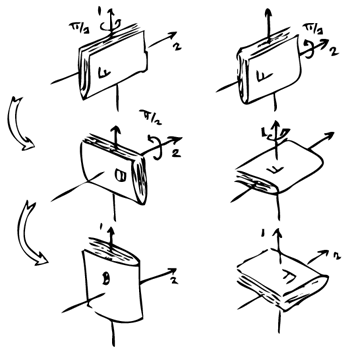

### Symbolic Verifications

In [ ]:
theta_1, theta_2, theta_3=symbols('theta_1 theta_2 theta_3');
R1_theta1=Matrix([[1,0,0],[0,cos(theta_1),-sin(theta_1)],[0,sin(theta_1),cos(theta_1)]])
R2_theta2=Matrix([[cos(theta_2),0,sin(theta_2)],[0,1,0],[-sin(theta_2),0,cos(theta_2)]])
R3_theta3=Matrix([[cos(theta_3),-sin(theta_3),0],[sin(theta_3),cos(theta_3),0],[0,0,1]])

**Composition of Rotations:** Finding the rotation matrix that relates a frame $\mathbf{b}$ to a frame $\mathbf{e}$ that is first a counter clockwise rotation around the first axis by an angle $\theta_1$ and then a counter clockwise rotation around the third axis by an angle $\theta_3$.

The first rotation gives $\mathbf{c}=\mathbf{e}R_1(\theta_1)$ and the second rotation gives $\mathbf{b}=\mathbf{c}\,R_3(\theta_3)$. Then $\mathbf{b}=\mathbf{c}\,R_3(\theta_3)=\mathbf{e}\,\underbrace{R_1(\theta_1)R_3(\theta_3)}_{R_a}$

In [ ]:
Ra=simplify(R1_theta1 @ R3_theta3)
Ra

Lets find the reverse sequence of rotations: That is first rotate about the third axis and then about the first axis.

The first rotation gives $\mathbf{d}=\mathbf{e}R_3(\theta_3)$ and the second rotation gives $\mathbf{b}=\mathbf{d}\,R_1(\theta_1)$. Then $\mathbf{b}=\mathbf{d}\,R_1(\theta_3)=\mathbf{e}\,\underbrace{R_3(\theta_3)R_1(\theta_1)}_{R_b}$



In [ ]:
Rb=simplify(R3_theta3 @ R1_theta1)
Rb

Notice that $\underbrace{R_1(\theta_1) R_3(\theta_3)}_{R_a}\neq \underbrace{R_3(\theta_3)R_1(\theta_1)}_{R_b}$

**Thus in general rotations do not commute**

### Numerical Verification

In [ ]:
theta1=np.pi/3; theta2=np.pi/3; theta3=np.pi/3;
O=[0,0,0]; OP=[1,1,1]; OQ=[1,-1,2];
R1theta1=np.array([[1,0,0],[0,np.cos(theta1),-np.sin(theta1)],[0,np.sin(theta1),np.cos(theta1)]])
R2theta2=np.array([[np.cos(theta2),0,np.sin(theta2)],[0,1,0],[-np.sin(theta2),0,np.cos(theta2)]])
R3theta3=np.array([[np.cos(theta3),-np.sin(theta3),0],[np.sin(theta3),np.cos(theta3),0],[0,0,1]])

In [ ]:
Ra=R1theta1 @ R3theta3; Rb=R3theta3 @ R1theta1;

In [ ]:
#Initiating a figure with a e-frame
fig=go.Figure();
O=[0,0,0];
fig=mr.add_orth_norm_frame(fig,O,np.array([[1,0,0],[0,1,0],[0,0,1]]),[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'blue')
#Adding a frame rotated by Ra
fig=mr.add_orth_norm_frame(fig,O,Ra,[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'red')
#Adding a frame rotated by Rb
fig=mr.add_orth_norm_frame(fig,O,Rb,[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'green')
fig.show()

## Euler's Theorem

Since $det (R)=1$ one can  show that the eignevalues of any $R\in SO(3)$ are of the form $\{1,e^{i\theta},e^{-i\theta}\}$. Thus it follows tht for any $R\in SO(3)$ there exists a $V\in \mathbb{R}^3$ such that $RV=V$. Now since $R$ acts on $\mathbb{R}^3$ by rigid rotations we see that this action leaves all points along  $V$ fixed. Furthermore this also shows that there eixts two frame transformations such that with respect to these transformations $R$ takes the form

\begin{align}
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos{\theta} & -\sin{\theta}\\
0 & \sin{\theta} & \cos{\theta}
\end{bmatrix}.
\end{align}

This shows that every rotation $R$ can be thought of as a rotation about some axis $n$ by some angle $\theta$. This is depicted in the figure below. This result is known as Euler's theorem on rotations.

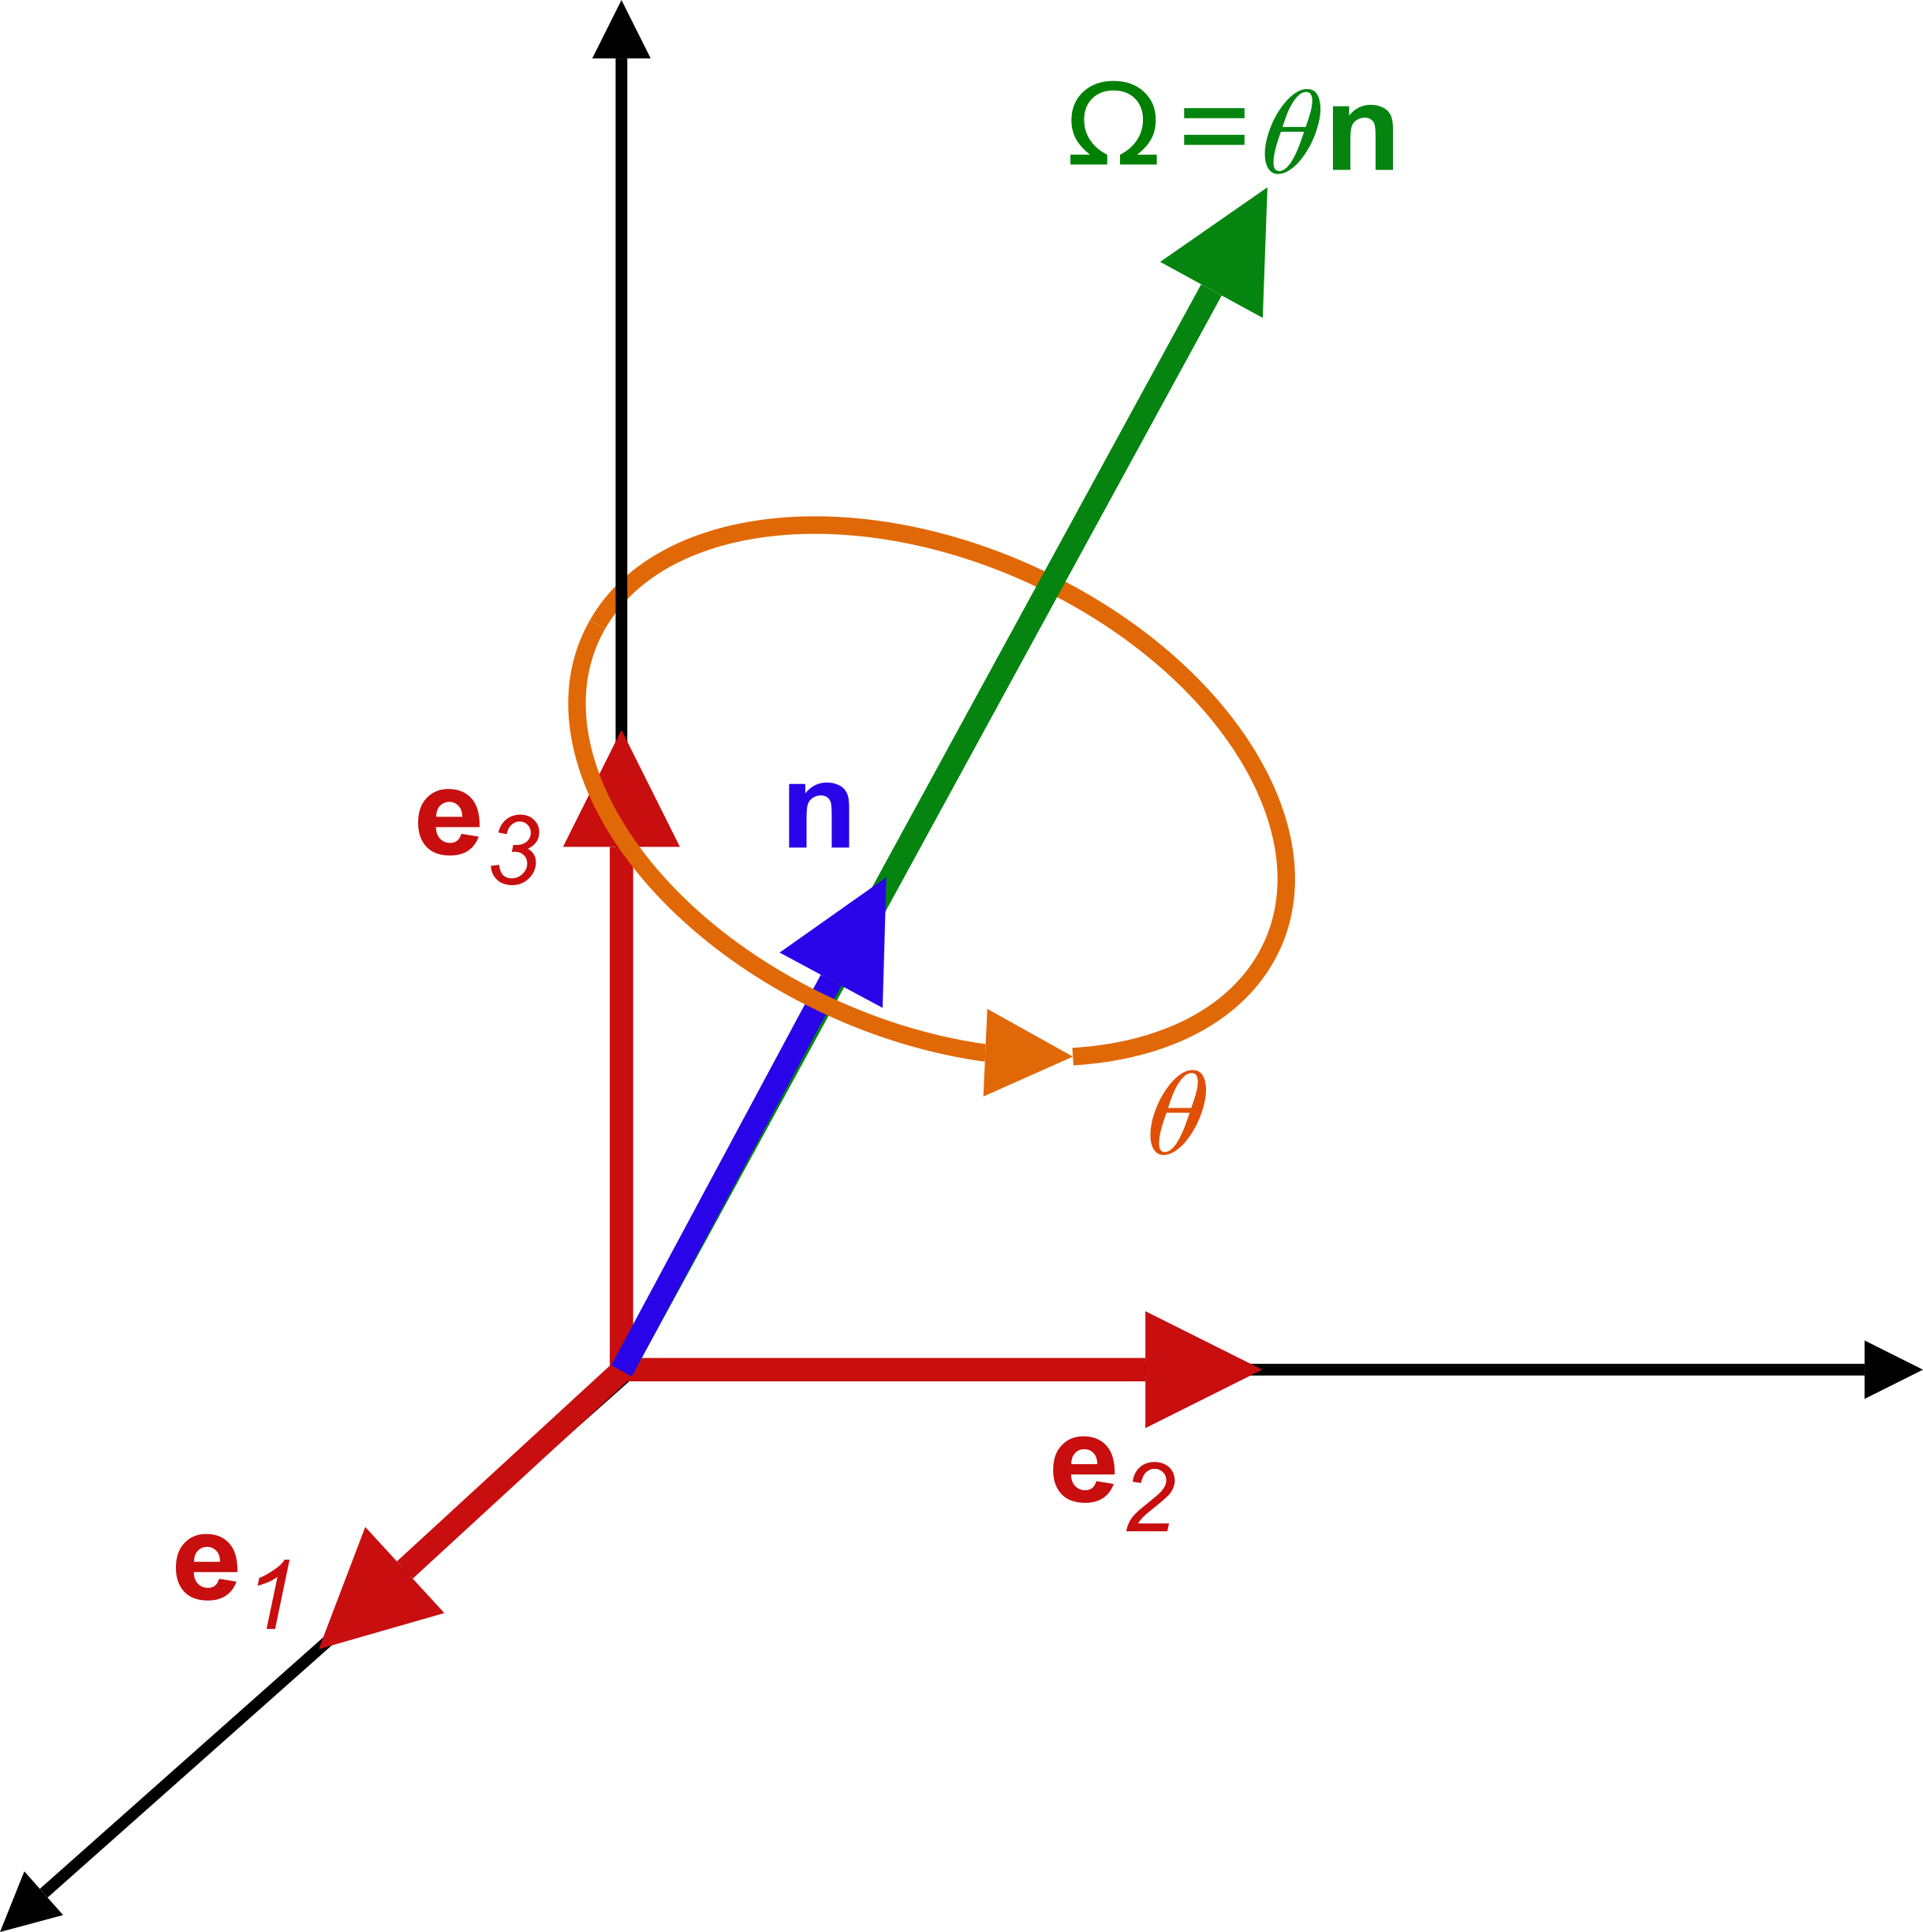

Therefore we see that the space of rotations, $\mathrm{SO}(3)$ can be identified with the solid ball in $\mathbb{R}^3$ with the antipodal points on the boundary identified or by the space of unit tangent vectors on $\mathbb{S}^2$ that is typically denoted by $T_0\mathbb{S}^2$. This confirms our previous conclusion that the dimension of the space $\mathrm{SO}(3)$ is three. On the other hand this also confirms our observation that the space of $SO(3)$ is quite different from $\mathbb{R}^3$. In fact this shows that $SO(3)$ is not isomorphic to $\mathbb{R}^3$. What this implies is that there exists no way of globally parameterizing $SO(3)$ using three parameters.


Since $SO(3)$ is three dimensional any choice of co-ordinates for parameterizing $\mathrm{SO}(3)$ will involve three components. Below we will describe a specific way of assigning coordinates, that are known as Euler angles. But since the preceding discussion shows that $SO(3)$ can not be isomorphic to $\mathbb{R}^3$ there exists no co-ordinate patch that will uniquely specify every point of $\mathrm{SO}(3)$. Thus any choice of Euler angles, or for that matter any three parameter local co-ordinate system on $\mathrm{SO}(3)$ will have points at which they become singular.


### Numerical Verification

In [ ]:
the1=np.pi/3; the2=np.pi/3; the3=np.pi/3;
O=[0,0,0]; OP=[1,1,1]; OQ=[1,-1,2];
R1the1=np.array([[1,0,0],[0,np.cos(the1),-np.sin(the1)],[0,np.sin(the1),np.cos(the1)]])
R2the2=np.array([[np.cos(the2),0,np.sin(the2)],[0,1,0],[-np.sin(the2),0,np.cos(the2)]])
R3the3=np.array([[np.cos(the3),-np.sin(the3),0],[np.sin(the3),np.cos(the3),0],[0,0,1]])
Ra=R1the1 @ R3the3; Rb=R3the3 @ R1the1;

In [ ]:
Ra

In [ ]:
D, V=linalg.eig(Ra)

In [ ]:
T=np.array([V.real.T[2],V.real.T[0],V.imag.T[0]]).T

In [ ]:
T.T @ Ra @ T

## Euler Angle Parameterization of $SO(3)$

We have seen that a seqeucne of rotations correspond to a serier multiplication of rotation matrices.

The $R\in SO(3)$ given by
\begin{align}
R&\triangleq R_{i}(\theta_\alpha)R_{j}(\theta_\beta)R_{k}(\theta_\gamma)
\end{align}
is in $SO(3)$ and corresponds to a rotation first about the $i^{\mathrm{th}}$ axis, then about the $j^{\mathrm{th}}$ axis and then finally about the $k^{\mathrm{th}}$ axis. Thus this process defines a map from $\mathbb{R}^3$ to $SO(3)$ that takes $(\theta_\alpha,\theta_\beta,\theta_\gamma)\in \mathbb{R}^3$ to $R_{ijk}= R_{i}(\theta_\alpha)R_{j}(\theta_\beta)R_{k}(\theta_\gamma)\in SO(3)$

One can show that for any combination of $i,j,k \in \{1,2,3\}$ where not all three $i,j,k$ are the same and no two consequtive indices are the same the resulting map is one-to-one and onto except for a very special set of $(\theta_\alpha,\theta_\beta,\theta_\gamma)$. Thus $(\theta_\alpha,\theta_\beta,\theta_\gamma)$ form a set of local coordinates for $SO(3)$. *Thus we see that $SO(3)$ is a 3-dimensional space. That is one needs three independent quantities to uniquely describe its elements.*

**This is called the $i-j-k$ Euler angle parameterization of $R\in SO(3)$.**


In [ ]:
alpha, beta, gamma=symbols('alpha beta gamma');
R1_alpha=Matrix([[1,0,0],[0,cos(alpha),-sin(alpha)],[0,sin(alpha),cos(alpha)]])
R2_beta=Matrix([[cos(beta),0,sin(beta)],[0,1,0],[-sin(beta),0,cos(beta)]])
R3_gamma=Matrix([[cos(gamma),-sin(gamma),0],[sin(gamma),cos(gamma),0],[0,0,1]])

In [ ]:
#Try out various combinations
simplify(R1_alpha @ R2_beta @ R3_gamma)

##### 3-1-3 Euler Angle Parameterization of $R\in SO(3)$

In [ ]:
theta_1, theta_2, theta_3=symbols('theta_1 theta_2 theta_3');
R1_theta2=Matrix([[1,0,0],[0,cos(theta_2),-sin(theta_2)],[0,sin(theta_2),cos(theta_2)]])
R3_theta1=Matrix([[cos(theta_1),-sin(theta_1),0],[sin(theta_1),cos(theta_1),0],[0,0,1]])
R3_theta3=Matrix([[cos(theta_3),-sin(theta_3),0],[sin(theta_3),cos(theta_3),0],[0,0,1]])

In [ ]:
simplify(R3_theta1 @ R1_theta2 @ R3_theta3)

This parameterization is shown in the figure below.
It is easy to see that  when $\theta_2=0$ or $\theta_2=\pi$ then $R=R_3(\theta_1+\theta_3)$ and hence that there exists no unique $\theta_1,\theta_3$ that describe the orientation of the resulting two frames $\mathbf{e}$ and $\mathbf{b}$. This situation is called \emph{gimbal lock} in the stellite and robotics communities.
This turns out to be a common problem for any type of Euler angles being used. Thus in particular we find that the Euler angles only provide a local isomorphism between $\mathbb{R}^3$ and $SO(3)$.

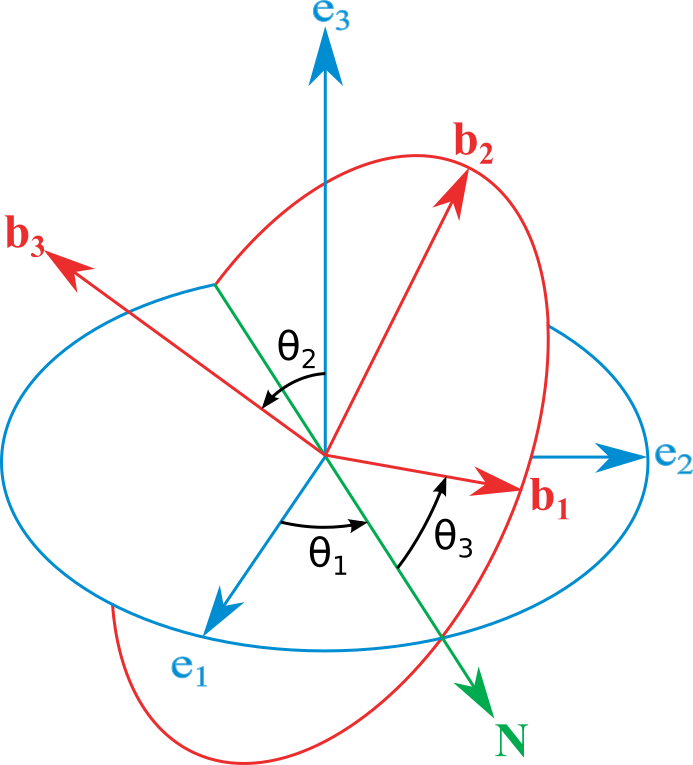

## Unit Quaternion Parameterization of $SO(3)$

Consider the case where an orthonormal frame $\mathbf{b}(t)$ is moving with respect to another orthonormal frame $\mathbf{e}$ such that the origins of the two frames remain coincident. Let $\mathbf{b}(t)=\mathbf{e}\,R(t)$ and $\widehat{\Omega}=R^T\dot{R}$. Consider $\Omega$ and $\omega=R\Omega$ (note that $\widehat{\omega}=\dot{R}R^T$).

In the section titled 'Angular Velocity' we have seen that $\omega$ represents the intantaneous axis of rotation of $\mathbf{b}(t)$ with respect to $\mathbf{e}$ as seen from $\mathbf{e}$. Furthermroe we also saw that the rate of this instantaneous rotation is eaqual to $||\omega||=||\Omega||$. Thus we saw that $\omega$ is the angular velocity of $\mathbf{b}(t)$ with respect to $\mathbf{e}$ as seen from $\mathbf{e}$ and that $\Omega$ is its representation with respect to $\mathbf{b}(t)$.

In this section we will take a closer look at the two equivalent matrix differential equations:
\begin{align}
\dot{R}&=R\widehat{\Omega}\\
\dot{R}&=\widehat{\omega}R
\end{align}
that correspond to $\widehat{\Omega}=R^T\dot{R}$ and $\widehat{\omega}=\dot{R}R^T$ respectively.

Let us concentrate on the solutions of  $\dot{R}=R\widehat{\Omega}$ and everything we will observe for this will have a corresponding simialr interpretation for $\dot{R}=\widehat{\omega}R$.

We note that if one considers element by element then $\dot{R}=R\widehat{\Omega}$ represents nine time varying ODEs. However since $R^TR=I_{3\times 3}$ defines six constraints we see that all the nine differential equations defined by $\dot{R}=R\widehat{\Omega}$ are not independent.


Since $R(t)$ corresponds to an instantaneous rotation about $\Omega$ (as seen in the $\mathbf{b}$ frame) at an instantaneous rate that is equal to $||\Omega||$. Thus if $\Omega$ is a constant then the solution to the following initial value problem
\begin{align}
\dot{R}&=R\widehat{\Omega},\:\:\:\:\:\:\: R(0)=I_{3\times 3},
\end{align}
is a pure rotation about the axis $\Omega$ at a constant angular rate of $\Omega$.
This says that if we define $\theta(t)\triangleq t||\Omega||$ then since $\Omega$ does not depend on $t$ we see that the solution, $R(t)$, to the initial value problem  is a rotation about the axis $\Omega$ by an angle equal to $\theta=t||\Omega||$.
It is easy to verify by direct computation that this solution is explicitly and uniquely given by
\begin{align}
{R}(t)&=\exp{(t\widehat{\Omega})},
\end{align}
where $\exp{(A)}$ denotes the matrix exponential of the matrix $A$.


Setting $t=1$ in ${R}(t)=\exp{(t\widehat{\Omega})}$ we see that $\exp{(\widehat{\Omega})}\in \mathrm{SO}(3)$ for any $\widehat{\Omega}\in \mathrm{so}(3)$ and that it corresponds to a rotation about the axis $\Omega$ by an angle $\theta=||\Omega||$.
This process defines a map $\exp : \mathrm{so}(3) \to \mathrm{SO}(3)$.
By uniqueness of solutions of differential equations we find that the so defined map
$\exp : \mathrm{so}(3) \to \mathrm{SO}(3)$ is locally one-to-one. Showing this is beyond the scope of this lecture notes as it requires advanced mathematical notions involving group theory.

Conversely in the previous section we have seen that teh Euler's theorem says that every $R \in \mathrm{SO}(3)$ can be thought of as a rotation about some axis $\Omega$ and hence that for any given $R$ there exists some $\widehat{\Omega}\in \mathrm{so}(3)$ such that $R=\exp{(\widehat{\Omega})}$. Thus we see that the map $\exp : \mathrm{so}(3) \to \mathrm{SO}(3)$ is onto as well.


**In summary what we have shown is that for every $\Omega$ there is a unique corresponding $R$ given by the matrix exponential $\exp{(\widehat{\Omega})}$ and that for every $R$ there also exists some $\Omega$ such that $R=\exp{(\widehat{\Omega})}$.**



Let us now proceed to find an explicit expression for $\exp{(\widehat{\Omega})}$. Previously we have shown that
\begin{align}
\widehat{\Omega}^2=(\Omega\Omega^T-||\Omega||^2I).
\end{align}
From this it follows that
\begin{align}
\widehat{\Omega}^3=-||\Omega||^2\widehat{\Omega},\:\:\:\:\:\:\:\widehat{\Omega}^4=-||\Omega||^2\widehat{\Omega}^2,\:\:\:\:\:\:\:\widehat{\Omega}^5=||\Omega||^4\widehat{\Omega},\:\:\:\:\:\:\:\cdots
\end{align}
and therefore we can show that
\begin{align}
\exp{\left({\widehat{\Omega}}\right)}&=I+\frac{\sin{||\Omega||}}{||\Omega||}\widehat{\Omega}+\frac{1}{2}\left(\frac{\sin{\frac{||\Omega||}{2}}}{{\frac{||\Omega||}{2}}}\right)^2\widehat{\Omega}^2.
\end{align}
This is famously known as the *Rodrigues formula*.

**We stress again that this corresponds to a rotation about the axis $\Omega$ by an angle $\theta=||\Omega||$**. Thus letting $n=\Omega/||\Omega||$ be the unit length direction along $\Omega$ we can write the above equation also as

\begin{align}
R=\exp{\left(\theta\,{\widehat{n}}\right)}&=I+\sin{\theta}\,\widehat{n}+(1-\cos{\theta})\,\widehat{n}^2.
\end{align}

Since we have seen that every $R \in \mathrm{SO}(3)$ can be written as $R=\exp{(\widehat{\Omega})}$ for some $\widehat{\Omega}\in \mathrm{so}(3)$ we can also conclude that every $R \in \mathrm{SO}(3)$ can be written down using the above expression for some angle $\theta$ and unit direction $n$.
Observe that specifically if $E_1=[1\:\:\:0\:\:\:0]^T,E_2=[0\:\:\:1\:\:\:0]^T,E_3=[0\:\:\:0\:\:\:1]^T$ then the Rodrigues formula gives that
$\exp{(\theta_i\widehat{E}_i)}=R_i(\theta_i)$ corresponds to a rotation about the axis $E_i$ by an angle equal to $\theta_i$.

Let $w=\sin{\left(\frac{\theta}{2}\right)}n$ and
$q_0=\cos{\left(\frac{\theta}{2}\right)}$.  Observe that since $q_0^2+||w||^2=1$ the ordered quadruple of numbers $q=(q_0,w)$ represents a point on the surface of the unit sphere, $\mathbb{S}^3=\{q\in \mathbb{R}^4\:\:\: |\:\:\: ||q||=1\}$, in $\mathbb{R}^4$.  Then re-arranging the above expression we have that every $R\in \mathrm{SO}(3)$ can be written down as

\begin{align*}
R&=I+2q_0\widehat{w}+2\widehat{w}^2.
\end{align*}
for some $(q_0,w)\in\mathbb{S}^3$.

Conversely we also see that for every $q=(q_0,w)\in \mathbb{S}^3$ there is a unique corresponding $R\in \mathrm{SO}(3)$  that is explicitly given by the above formula. Note that, since $-q=(-q_0,-w)\in \mathbb{S}^3$ also gives the same $R$ that is given by $q=(q_0,w)\in \mathbb{S}^3$, this correspondence is two-to-one. In summary, we have the following:

The group of rotations $\mathrm{SO}(3)$ is isomorphic to $\mathbb{S}^3/\{1,-1\}$ where the isomorphism is explicitly given by the above expression
$R=I+2q_0\widehat{w}+2\widehat{w}^2$.
Here $R$ corresponds to a rotation about $w$ by an angle equal to $\theta =2\cos^{-1}({q_0})$.
Using algebraic manipulations it can also be shown that, in terms of $(q_0,w)\in \mathbb{S}^3$, the differential equation $\dot{R}=R\widehat{\Omega}$ becomes

\begin{align}
\left[\begin{array}{c}\dot{q}_0 \\ \dot{w}
\end{array}\right] &=
\frac{1}{2}\left[\begin{array}{c}-\Omega \cdot w \\ q_0\Omega-\Omega\times {w}
\end{array}\right].
\end{align}


The unit sphere in $\mathbb{R}^4$, denoted by $\mathbb{S}^3=\{q\in \mathbb{R}^4 \:\:\:|
\:\:\: ||q||=1\}$ is also known as the space of *unit quaternions*. We conclude this section by noting that the unit quaternion $q=(q_0,w)$ that correspond to a given rotation matrix $R$ can be found using the following two expressions:
\begin{align}
\mathrm{trace}(R)&=-1+4q_0^2=2\cos \theta +1,\\
R-R^T&=4q_0 \widehat{w}=4\cos{\left(\frac{\theta}{2}\right)} \widehat{w}.
\end{align}
The first expression determines $q_0=\cos{\frac{\theta}{2}}$ and the second expression determines $w$.

### Numerical Verifications

In [ ]:
mr.r_from_quaternions

In [ ]:
q=mr.q_from_axis_angles(np.pi/2,[1,1,0]/np.sqrt(2))
print(q)

In [ ]:
R=mr.r_from_quaternions(q);

In [ ]:
mr.r_from_quaternions

In [ ]:
fig=go.Figure()
fig=mr.add_orth_norm_frame(fig,[0,0,0],np.eye(3),[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'blue')
fig=mr.add_orth_norm_frame(fig,[0,0,0],R,[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'red')
fig.show()

## Integration of Rotational Kinematics

We have seen that the solution to the initial value problem $\dot{R}=R\widehat{\Omega}$, $R(0)=R_0$ is explicitly given by $R(t)=R_0\exp{(t\widehat{\Omega})}$ if ${\Omega}$ is a constant.

If $\Omega (t)$ is time varying then, in general, there exists no such explicit solution and one needs to resort to numerical methods of finding an approximate solution.

The above explict solution gives us one suach natural scheme that is based on the Euler's method of approximation.

Consider a discrete sequence of time points $\{t_0,t_1,\cdots, t_k,t_{k+1},\cdots,t_N\}$ at which we need to aproximate the solution of our initial value problem. Let $R_k\triangleq R(t_k)$ and $\Omega_k\triangleq \Omega(t_k)$ and $\Delta t_k\triangleq (t_{k+1}-t_k)$. The assuming that $\Omega(t)\approx \Omega(t_k)$  during the time interval $[t_k,t_{k+1}]$ we see that

\begin{align}
R_{k+1}&\approx R_k\exp{(\Delta t_k\Omega_k)}
\end{align}
with $R_0=R(0)$. The accuracy of this approximation increases as $\Delta t_k$ beocmes small.

Note that we can explicitly compute $\exp{(\Delta t_k\Omega_k)}$ using the Euler-Rodrigues formula
\begin{align}
\exp{(\Delta t_k\Omega_k)}=I+2{q_0}_k\widehat{w}_k+2\widehat{w}^2_k
\end{align}
where
\begin{align}
\theta_k&=\Delta t_k||\Omega_k||,\\
{q_0}_k&=\cos{\left(\frac{\theta_k}{2}\right)},\\
w_k &= \sin{\left(\frac{\theta_k}{2}\right)}\frac{\Omega_k}{||\Omega_k||}.
\end{align}

#### Numerical Example

Consider $\dot{R}=R\widehat{\Omega}$ where $\Omega(t)=[\sin{t},\cos{t},0]$. We are intersted in finding the rotation matrix $R$ when $t=2\pi$ with $R(0)=I_{3\times 3}$.

Consder the equally spaced sequence of time points $[0,t_1,t_2,\cdots,2\pi]$ where $\Delta t_k=2\pi/10$.

In [ ]:
R0=np.eye(3);
listR=[R0];
t=np.linspace(0,2*np.pi,11);
for k in t:
  Omega_k=[np.sin(k),np.cos(k),0];
  theta_k=(2*np.pi/11)*linalg.norm(Omega_k);
  n_k=Omega_k/linalg.norm(Omega_k);
  q_k=mr.q_from_axis_angles(theta_k,n_k)
  R0=R0 @ mr.r_from_quaternions(q_k);
  listR+=[R0]

In [ ]:
n=11
fig=go.Figure()
fig=mr.add_orth_norm_frame(fig,[0,0,0],np.eye(3),[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'blue')
fig=mr.add_orth_norm_frame(fig,[0,0,0],listR[n],[[-1.5,1.5],[-1.5,1.5],[-1.5,1.5]],'red')
fig.show()

In [ ]:
cube_dimensions={'l':4, 'w':2,'h':1, 'xp':2, 'yp':1, 'zp':0.5}
XX0=mr.cube_vertices(cube_dimensions)
XX=[];
for R in listR:
  XX+=[[R @ XX0]]
fig=mr.animated_cube_flat_shading(XX,'Cube')

# Rigid Body Motion

In this section we consider the motion of a collection of non co-linear interacting particles $P_1,P_2,\cdots,P_n$ where the interactions ensure that the relative distance between any two particles remain the same at all time. Such a set of particles is called a *rigid body*.

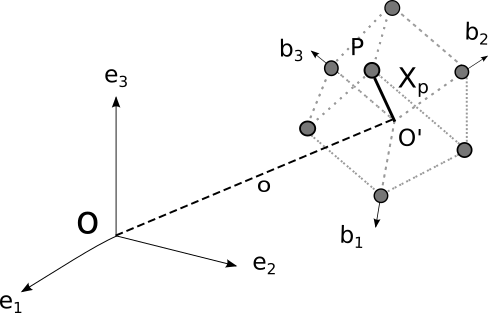

## Rigid Body Kinematics

Let $\mathbf{e}$ be an inertial frame with origin $O$ and and let $\mathbf{b}(t)$ be an ortho-normal frame with origin $O'$ in which all the particles $P_i$ appear to be fixed as illustrated for example in the figure above. We will call $\mathbf{b}(t)$ the body frame. Let $OO'=\mathbf{e}o(t)$. The position of the $i^\mathrm{th}$ point $P_i$ at a time $t$, is given by $x_i(t)$ with respect to the frame $\mathbf{e}$ and by $X_i$
with respect to the body frame $\mathbf{b}(t)$. Observe that since all points on the body appear to be fixed with respect to the body frame $\mathbf{b}(t)$, the representation $X_i$ is independent of time. Therefore specifying $\mathbf{b}(t)$ amounts to specifying the configuration
of the rigid body. Since $\mathbf{b}(t)$ is uniquely related to the inertial frame $\mathbf{e}$ by the rotational matrix $R(t)$, where $\mathbf{b}(t)=\mathbf{e}\,R(t)$, and the position of its origin $o(t)$, the specification of $(o(t),R(t))$ amounts to the unique specification of the configuration of the rigid body with respect to the inertial frame $\mathbf{e}$. Similarly any $(o,R)$ where $o\in \mathbb{R}^3$ and $R\in \mathrm{SO}(3)$ defines a unique configuration of the rigid body. Thus the configuration space of rigid body motion is $ \mathbb{R}^3\times \mathrm{SO}(3)$ where we have denoted the space of $3\times 3$ special orthogonal matrices by $\mathrm{SO}(3)$.

The pair $(o,R)\in \mathbb{R}^3 \times \mathrm{SO}(3)$ can also be identified with a unique $4\times 4$ matrix
\begin{align}
E&=\begin{bmatrix}
R & o \\ 0 & 1\end{bmatrix}.
\end{align}
The spcace of all such $4\times 4$ matrices are referred to as the space of special euclidean group of matrices that is denote by $SE(3)$.

Recall that the quantity $\Omega$ where $\widehat{\Omega}=R^T\dot{R}$ corresponds to an instantaneous rotation of the body about the axis $\Omega$ as expressed in the body frame $\mathbf{b}$ by an
amount equal to the magnitude $||\Omega||$ and thus that $\Omega$ can be defined to be the **body angular velocity** of the rigid body. The $\mathbf{e}$ frame version of this quantity $\omega \triangleq R\Omega$ is defined to be the **spatial angular velocity** of the rigid body.

The equation
\begin{align}
\dot{R}&=R\widehat{\Omega}
\end{align}
that defines angular velocity is usually referred to as the **rigidbody kinematic** equations.

Since $\widehat{\Omega}=\widehat{R^T\omega}=R^T\widehat{\omega}R$ this can also be equivalently written down as
\begin{align}
\dot{R}&=\widehat{\omega}R.
\end{align}


## Total Linear Momentum of a Rigid Body

Recall that the total linear momentum of a set of particles can be written down as
\begin{align}
p&=\sum_{i}p_i=\sum_{i}m_i\left(\dot{o}+R(\widehat{\Omega}{X}_i+\dot{X}_i)\right).
\end{align}
In the case of a rigid body $\dot{X}_i=0_{3\times 1}$ and hence
\begin{align}
p&=M(\dot{o}+R\widehat{\Omega}\bar{X})=M(\dot{o}+\widehat{\omega}R\bar{X})=M\dot{\bar{x}},
\end{align}
where $M=\sum_{i}m_i$, $\bar{X}=\sum_{i}m_i X_i/\sum_{i}m_i$ is the center of mass of the rigid body represented with repect to frame $\mathbf{b}$ fixed to the body (body frame).

Thus we also see that that the translational kinematics are given by
\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times R\bar{X}.
\end{align}

## Total Angular Momentum of a Rigid Body

Also recall that angular momentum of a point particle of mass $m_i$ about the origin $O'$ of a $\mathbf{b}$ frame takes the form
\begin{align}
\pi_i&= R\left(\mathbb{I}_i\Omega+m_iX_i\times( R^T\dot{o}+ \dot{X}_i)\right),
\end{align}
in the $\mathbf{e}$ frame and
\begin{align}
\Pi_i= \left(\mathbb{I}_i\Omega+m_iX_i\times(\dot{X}_i+ R^T\dot{o})\right),
\end{align}
in the $\mathbf{b}$ frame where the quantity
\begin{align}
\mathbb{I}_i &\triangleq -m_i\widehat{X}_i^2=m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right),
\end{align}
is defined as the *moment of inertia* of the particle $P_i$ about the point $O'$ in the frame $\mathbf{b}$.

Since in a rigid body the particles are fixed with respect to the frame $\mathbf{b}$ we have that $\dot{X}_i=0_{3\times 1}$ and then we have
\begin{align}
\pi_i&= R\underbrace{\left(\mathbb{I}_i\Omega+m_iX_i\times R^T\dot{o}\right)}_{\Pi_i},
\end{align}
Summing them over all the particles we have that the total angulare momentum about $O'$ is given by
\begin{align}
\pi&=\sum_{i}\pi_i= R\underbrace{\left(\mathbb{I}\Omega+M\bar{X}\times R^T\dot{o}\right)}_{\Pi},
\end{align}
where $M=\sum_{i}m_i$, $\bar{X}=\sum_{i}m_i X_i/\sum_{i}m_i$ is the representation of the center of mass of the rigid body in the $\mathbf{b}$ frame, and
\begin{align}
\mathbb{I} &\triangleq \sum_{i}-m_i\widehat{X}_i^2=\sum_{i}m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right),
\end{align}
is defined as the *moment of inertia* of the body about the point $O'$ in the frame $\mathbf{b}$. It is easy to see that this is a symmetric positive definite matrix if all the ponts are not co-linear.

Since $p=M\dot{\bar{x}}=M(\dot{o}+R(\Omega\times \bar{X}))$ we see that $M\dot{o}\times \dot{\bar{x}}=\dot{o}\times p=-R(\Omega \times \bar{X})\times p$ we also see that
\begin{align}
\pi&=R\left(\mathbb{I}\Omega +M\bar{X}\times R^T\left(\frac{1}{M}p-R(\Omega\times \bar{X})\right)\right)\\
&=R\left(\mathbb{I}\Omega +\bar{X}\times R^Tp+M\bar{X}\times \bar{X} \times\Omega\right)\\
&=R\left((\mathbb{I}+M\widehat{\bar{X}}^2)\Omega +\bar{X}\times R^Tp)\right)\\
&=R\left(\mathbb{I}_c\Omega +\bar{X}\times R^Tp)\right).
\end{align}
where
\begin{align*}
\mathbb{I}_c&\triangleq \mathbb{I}+M\widehat{\bar{X}}^2
\end{align*}
is the inertia tensor of the body with respect to a frame that is parallel to $\mathbf{b}$ and origin coinciding with the center of mass of the object, $O_c$.



*When written as
\begin{align}
\mathbb{I}&=\mathbb{I}_c-M\widehat{\bar{X}}^2
\end{align}
this turns out to be the parallel axis theorem.*

Also note that since $\Omega =R^T\omega$ we have
\begin{align}
\pi&=R\left(\mathbb{I}_c\Omega +\bar{X}\times R^Tp)\right),\\
&=(R\mathbb{I}_cR^T)\omega +R\bar{X}\times p,\\
&=\mathbb{I}_c^R\omega +R\bar{X}\times p.
\end{align}
where
\begin{align}
\mathbb{I}_c^R\triangleq R\mathbb{I}_cR^T=R(\mathbb{I}+M\widehat{\bar{X}}^2)R^T,
\end{align}
is defined to be the *locked inertia tensor* in the body. It can be shown that $\mathbb{I}_c^R$ is the moment of inertia tensor of the body with respect to a frame that is parallel to $\mathbf{e}$ and  orign coinciding with the center of mass $O_c$.

In summary consider a set of particle rigid with respect to each other and $\mathbf{b}$ be a body fixed frame with origin coinciding with the point $O'$ around which the moments are defined.

Then the angular momentum of the particles about a point $O'$ can be written down in the following equivalent forms:

\begin{align}
\pi&=R\left(\mathbb{I}\Omega+M\bar{X}\times R^T\dot{o}\right)
\end{align}
where $\mathbb{I}$ is the moment of inertia tensor with respect to the frame $\mathbf{b}$ with orign $O'$,
\begin{align}
\pi&=R\left(\mathbb{I}_c\Omega+\bar{X}\times R^Tp\right)
\end{align}
where $\mathbb{I}_c$ is the moment of inertia tensor with respect to a frame that is parallel to $\mathbf{b}$ and  orign coinciding with the center of mass $O_c$, and
\begin{align}
\pi&=\mathbb{I}_c^R\omega+R\bar{X}\times p
\end{align}
where $\mathbb{I}_c^R$ is the moment of inertia tensor with respect to a frame that is parallel to $\mathbf{e}$ and  orign coinciding with the center of mass $O_c$.

In the case where the moments are taken about the center of mass of the body we have that
\begin{align}
\pi&=R\mathbb{I}_c\Omega=\mathbb{I}_c^R\omega.
\end{align}

## Derivation of the equations of motion of a rigid body

Rigid or not we have shown in the section on motion of a set of interacting particles that:
\begin{align}
\dot{p}&=M\ddot{\bar{x}}=f^e,\\
\dot{\pi}&=-M\dot{o}\times \dot{\bar{x}}+\tau_e
\end{align}
where $M=\sum_{i=1}^nm_i$ is the total mass of the particles, $\bar{x}$ is the representation of the center of mass of the set of particles in the inertial frame $\mathbf{e}$, $p=\sum_{i=1}^np_i$ is the total linear momentum of the system of particles, $f^e=\sum_{i=1}^n f_i^e$ is the total resultant of the external forces acting on the particles, $\pi =\sum_{i=1}^n\pi_i$ is the total angular momentum of the particles about $O'$, $\tau^e=\sum_{i=1}^n(x_i-o)\times f_i^e$ is the resultant force moment of the external interactions acting on the particles about the point $O'$, and $o$ is the representation of the point $O'$ in the frame $\mathbf{e}$.

**Notice the extreme simplicity of the form of these governing equations however complicated the system of particles is.**

In the case of a rigid body one can fix a frame $\mathbf{b}$ to the body. Let $o(t)$ be the representation of the origin $O'$ of the frame $\mathbf{b}$ with respect to $\mathbf{e}$ and let $\mathbf{b}=\mathbf{e}R(t)$. Also let $\widehat{\Omega}=R^T\dot{R}$ and $\omega =R\Omega$.

Then the specification of $(o(t), R(t))$ over time completely describes the motion of the set of particles. Thus describing the motion of the set of particles amounts to the specification of $(o(t), R(t))$ over time.


### The $\mathbf{e}$-frame (spatial) description of rotating and translating rigid body equations

Let $\bar{x}'\triangleq (\bar{x}-o)=R\bar{X}$. Differentiating this expression gives
\begin{align}
\dot{\bar{x}}'&=R(\Omega \times \bar{X})=\omega \times \bar{x}'.
\end{align}
Then the fact that $p=M\dot{\bar{x}}$ gives
\begin{align}
\dot{\pi}&=-M\dot{o}\times \dot{\bar{x}}+\tau_e=M\dot{\bar{x}}'\times \dot{\bar{x}}+\tau_e=\omega \times \bar{x}'\times p+\tau_e
\end{align}

We also saw that the rigid body kinematic equations are given by $M\dot{o}=p-M\omega \times \bar{x}'$ and $\dot{R}=\widehat{\omega}R$.



Putting these together we arrive at the fully determined set of coupled ODEs
\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times \bar{x}',\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e,\\
\dot{\pi}&=\omega \times \bar{x}'\times p+\tau_e
\end{align}
where
\begin{align}
\bar{x}'(t)&=R(t)\bar{X},\\
\omega &=(\mathbb{I}_c^R)^{-1}\left(\pi-\bar{x}'\times p\right).
\end{align}
Solving the above equations one can obtain $R(t)$ and $o(t)$ and hence uniquely describe the motion of the rigid body.


Note that if one choses to **take the moments about the center of mass**  of the rigid body then then the above equations become even simpler:

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e,\\
\dot{\pi}&=\tau_e,
\end{align}
and
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi.
\end{align}
Equations of systems don't come any simpler than this!!!

These simple expressions are valid for any rigid body motion and we will use them heavily in our controller development and simulation of rigid body motion.

### The $\mathbf{b}$-frame (body) description of rotating and translating rigid body equations

Differentiating $p$ and $\pi$ written down in the $\mathbf{b}$ frame we have
\begin{align}
\dot{p}&=M\ddot{o}+R\left(M\,\left(\widehat{\Omega}^2(t) +\dot{\widehat{\Omega}}(t)\right)\bar{X}\right)=  R F^e=f^e,\\
\dot{\pi}&=R\left(\mathbb{I}\dot{\Omega}-\mathbb{I}{\Omega}\times \Omega-MR^T\dot{o}\times \Omega\times \bar{X} +M\bar{X}\times R^T\ddot{o}\right)=R\left(-MR^T\dot{o}\times \Omega\times {\bar{X}}+T^e\right)=-M\dot{o}\times \dot{\bar{x}}+\tau^e.
\end{align}

Thus we have that the rigid body equations $\dot{p}=f^e$ and $\dot{\pi}=-M\dot{o}\times \dot{\bar{x}}+ \tau^e$ are given equivalently in the $\mathbf{b}$ frame by
\begin{align}
MR^T\ddot{o}+\left(M\,\left(\widehat{\Omega}^2(t) +\dot{\widehat{\Omega}}\right)\bar{X}\right)&= F^e,\\
\left(\mathbb{I}\dot{\Omega}-\mathbb{I}{\Omega}\times \Omega+M\bar{X}\times R^T\ddot{o}\right)&=T^e.
\end{align}
Re-arranging them we obtain
\begin{align}
MR^T\ddot{o}-M\,\widehat{\bar{X}}\dot{\Omega}&= -M\,\widehat{\Omega}^2(t) \bar{X} + F^e,\\
\mathbb{I}\dot{\Omega}&=\mathbb{I}{\Omega}\times \Omega-M\bar{X}\times R^T\ddot{o}+T^e.
\end{align}
Replacing $R^T\ddot{o}$ in the last equation with the one beofre that we obtain
\begin{align}
\mathbb{I}\dot{\Omega}&=\mathbb{I}{\Omega}\times \Omega-\bar{X}\times \left(M\,\widehat{\bar{X}}\dot{\Omega}-M\,\widehat{\Omega}^2 \bar{X} + F^e\right)+T^e.
\end{align}
Which gives
\begin{align}
(\mathbb{I}\,+M\,\widehat{\bar{X}}^2)\dot{\Omega}&=\mathbb{I}{\Omega}\times \Omega+M\bar{X}\times \widehat{\Omega}^2 \bar{X} - \bar{X}\times F^e+T^e.
\end{align}

Note that
\begin{align*}
\bar{X}\times \widehat{\Omega}^2\bar{X}&=\widehat{\bar{X}}\left(\Omega\Omega^T-||\Omega||^2I_{3\times 3}\right)\bar{X}=\widehat{\bar{X}}\Omega(\Omega\cdot \bar{X})=-\widehat{\Omega}\bar{X}\widehat{X}^T\Omega\\
&=-\widehat{\Omega}\left(\bar{X}\widehat{X}^T-||\bar{X}||^2I_{3\times 3}\right)\Omega=-\Omega\times \widehat{\bar{X}}^2\Omega
\end{align*}
This when substituted in the previous expression results in
\begin{align}
\mathbb{I}_c\dot{\Omega}+\Omega \times \mathbb{I}_c{\Omega}=-\bar{X}\times F^e+T^e,
\end{align}
where
\begin{align*}
\mathbb{I}_c&\triangleq \mathbb{I}+M\widehat{\bar{X}}^2
\end{align*}
is the inertia tensor of the body with respect to a frame that is parallel to $\mathbf{b}$ and origin coinciding with the center of mass of the object, $O_c$, and $T^e$ is the resultant moment of the external forces about the origin $O'$ of the body frame $\mathbf{b}$.


Let $o_c$ be the representation of the center of mass of the body with respect to the inertial frame $\mathbf{e}$. Thus $\tau_c^e=\sum_{i=1}^n(x_i-o_c)\times f_i^e$ is the resultant moment of the external forces about the center of mass of the rigid body. Note that $\bar{X}=R^T(o_c-o)$. Thus we have
\begin{align*}
\tau^e=\sum_{i=1}^n(x_i-o)\times f_i^e=\sum_{i=1}^n(x_i-o_c+o_c-o)\times f_i^e=\tau^e_c+R\bar{X}\times f^e=\tau^e_c+R(\bar{X}\times F^e).
\end{align*}
Then we have that the $\left(\mathbb{I}\dot{\Omega}-\mathbb{I}{\Omega}\times \Omega+M\bar{X}\times R^T\ddot{o}\right)=T^e$ take the equivalent form
\begin{align*}
\mathbb{I}_c\dot{\Omega}+\Omega \times \mathbb{I}_c{\Omega}=T^e_c,
\end{align*}
where $T^e_c\triangleq -\bar{X}\times F^e+T^e$ is the $\mathbf{b}$-frame representation of the resultant moments acting on the body with respect to the center of mass of the body.

Thus in summary we have that the equations of motion of the system of rigid particles are completely specified in the body frame as follows:

\begin{align*}
\dot{R}&=R\widehat{\Omega},\\
MR^T\ddot{o}-M\,\widehat{\bar{X}}\dot{\Omega}&= -M\,\widehat{\Omega}^2(t) \bar{X} + F^e,\\
\mathbb{I}_c\dot{\Omega}&=\mathbb{I}_c\Omega \times {\Omega}+T^e_c.
\end{align*}


Again when the moments are defined about a frame with origin coinciding with the center of mass we have the much simpler set of equations:
\begin{align*}
\dot{R}&=R\widehat{\Omega},\\
M\ddot{o}&= f^e,\\
\mathbb{I}_c\dot{\Omega}&=\mathbb{I}_c\Omega \times {\Omega}+T^e_c.
\end{align*}
**These are commonly referred to as Euler's Rigid Body Equations**


In this we also saw that $\pi=R\mathbb{I}_c\Omega=\mathbb{I}_c^R\omega$. Then we can also write the above equations using $\Pi=R^T\pi=\mathbb{I}_c\Omega$ as
\begin{align*}
\dot{R}&=R\,\widehat{\mathbb{I}_c^{-1}\Pi},\\
M\ddot{o}&= f^e,\\
\dot{\Pi}&=\Pi \times {\mathbb{I}_c^{-1}\Pi}+T^e_c.
\end{align*}

Since the moment of inertia tensor is always symmetric and positive definite it is always possible to find a body frame $\mathbf{b}$ such that the Inertia tensor $\mathbb{I}_c$ is diagonalized. For instance in an axi-symmetric rigid body if the body frame $\mathbf{b}$ is aligned along the axes of symmetry then it can be shown that the inertia matrix $\mathbb{I}_c$ is diagonal. The diagonal elements are called the principle moments of inertia.
Let the body frame $\mathbf{b}$ be chosen such that the inertia tensor is diagonalized
\begin{align}
\mathbb{I}_c=\left[ \begin{array}{ccc} \mathbb{I}_1 & 0 & 0\\ 0 & \mathbb{I}_2 & 0\\0 & 0 & \mathbb{I}_3\end{array}\right],
\end{align}
where the principle moments of inertia are given by $\mathbb{I}_1,\mathbb{I}_2,\mathbb{I}_3$.  Based on the values of the principle moments of inertia one can classify rigid bodies into three distinct categories:

* **Asymmetric Rigid Body:** $\mathbb{I}_1>\mathbb{I}_2>\mathbb{I}_3$
* **Axi-Symmetric Rigid Body:** $\mathbb{I}_1=\mathbb{I}_2>\mathbb{I}_3$ or
$\mathbb{I}_1>\mathbb{I}_2=\mathbb{I}_3$
* **Symmetric Rigid Body:** $\mathbb{I}_1=\mathbb{I}_2=\mathbb{I}_3$


When the body frame $\mathbf{b}$ coincides with the directions of the principle moments of inertia of the object, the rotation dynamics (\ref{eq:EulerEqns3D}) take the form
\begin{align}
\mathbb{I}_1\dot{\Omega}_1 & =  (\mathbb{I}_2-\mathbb{I}_3)\Omega_2 \Omega_3 + T_1^e, \\
\mathbb{I}_2\dot{\Omega}_2 & =  (\mathbb{I}_3-\mathbb{I}_1)\Omega_3 \Omega_1 + T_2^e, \\
\mathbb{I}_3\dot{\Omega}_3 & =  (\mathbb{I}_1-\mathbb{I}_2)\Omega_1 \Omega_2 + T_3^e,
\end{align}


### Purely rotating Rigid Body Equations

Consider a rigid body moving in space such that there exists a point $O'$ that is fixed with respect to the spatial frame $\mathbf{e}$. This point is commonly referred to as the pivot point.

#### $\mathbf{e}$-frame equations

Recall that the general rigid body equations in the $\mathbf{e}$-frame are given by
\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times \bar{x}',\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e,\\
\dot{\pi}&=\omega \times \bar{x}'\times p+\tau_e
\end{align}
where
\begin{align}
\bar{x}'(t)&=R(t)\bar{X},\\
\omega &=(\mathbb{I}_c^R)^{-1}\left(\pi-\bar{x}'\times p\right).
\end{align}

When body moves such that one of its points is fixed (pivoted) we will without loss of generality pick the orign $O'$ of the body fixed frame $\mathbf{b}$ to coincide with the fixed point. Then $\dot{o}\equiv 0$ and hence we have $p=M\,\omega\times \bar{x}'$ and
\begin{align}
\pi&=\mathbb{I}_c^R\omega-MR\bar{X}\times R\bar{X}\times \omega=(R\mathbb{I}_c R^T-MR\widehat{\bar{X}}^2R^T) \omega
=R(\mathbb{I}_c-M\widehat{\bar{X}}^2)R^T\,\omega=R\mathbb{I}R^T\,\omega.
\end{align}

Hence that the above equations reduce to:
\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=\tau_e
\end{align}
where
\begin{align}
\bar{x}'(t)&=R(t)\bar{X},\\
\omega &=(\mathbb{I}^R)^{-1}\pi.
\end{align}
Notice that the moment of inertia tensor in this case is that with respect to the frame $\mathbf{b}$ whose origin coincides with the pivot point.


#### $\mathbf{b}$-frame equations

\begin{align*}
\dot{R}&=R\widehat{\Omega},\\
\mathbb{I}\dot{\Omega}&=\mathbb{I}\Omega \times {\Omega}+T^e.
\end{align*}

### Body angular momentum version of the rotation equations

When the moments are defined about the center of mass for a rotating and translating rigid body and about the pivot point for a purely rotating rigid body we see that $\pi=R\mathbb{I}\Omega=\mathbb{I}^R\omega$.
where $\mathbb{I}$ is the moment of inertia tensor about the center of mass for a rotating and translating rigid body and about the pivot point for a purely rotating rigid body and expressed with respect to a body fixed frame $\mathbf{b}$ whose origin coincides with the point around which the moments are defined.

Then we can also write the rotational dynamic equations using $\Pi=R^T\pi=\mathbb{I}\Omega$ as
\begin{align*}
\dot{R}&=R\,\widehat{\mathbb{I}^{-1}\Pi},\\
\dot{\Pi}&=\Pi \times {\mathbb{I}^{-1}\Pi}+T^e_c.
\end{align*}


When the body frame $\mathbf{b}$ coincides with the directions of the principle moments of inertia of the object this equation takes the form
\begin{align}
\dot{\Pi}_1 & =  \frac{(\mathbb{I}_2-\mathbb{I}_3)}{\mathbb{I}_2 \mathbb{I}_3}\Pi_2 \Pi_3+ T_1^e, \\
\dot{\Pi}_2 & =  \frac{(\mathbb{I}_3-\mathbb{I}_1)}{\mathbb{I}_3 \mathbb{I}_1}\Pi_3 \Pi_1+ T_2^e, \\
\dot{\Pi}_3 & =  \frac{(\mathbb{I}_1-\mathbb{I}_2)}{\mathbb{I}_1 \mathbb{I}_2}\Pi_1 \Pi_2+ T_3^e.
\end{align}

*It is important to note that, since $\Pi=\mathbb{I}\Omega$, in general the direction of the body angular momentum does not coincide with the direction of the body angular velocity.
For a rigid body that is moving freely in space (ie. isolated from the rest of the universe) the total spatial angular momentum $\pi$ is always constant (since $\dot{\pi}=\tau^e=0$). However, we note that, since $\Pi=R^T\pi$ the body angular momentum, $\Pi$, is not conserved. Nevertheless since $||\Pi||=||R^T\pi||=||\pi||$ we see that the magnitude of the body angular momentum is still conserved for freely rotating rigid body motion.*
When the set of particles of the rigid body are not isolated from the rest of the universe we find that
\begin{align}
\frac{d }{dt}||\Pi(t)||=\frac{d}{dt}\sqrt{\Pi \cdot \Pi}=\frac{{\Pi \cdot \dot{\Pi}}}{\sqrt{\Pi \cdot \Pi}}=\frac{{\Pi \cdot (\Pi\times \mathbb{I}^{-1}\Pi+T^e)}}
{\sqrt{\Pi \cdot \Pi}}=\frac{{\Pi \cdot T^e}}{||\Pi||},
\end{align}
where the last equality follows from $
A \cdot (A \times B) = 0$.

## Rigid Body Equations - Summary

We have seen that the equstions of motion of a rigid body takes a very simple form when

* the moments are considered about the center of mass for a general rotating and translating rigid body

* when the moments are considered about the  pivot point of a purely rotating rigid body.

Thus we will use the convention of fixing the body frame $\mathbf{b}$ such that its origin coincides with the center of mass in the first case and at the pivot point in the second case.

### Translating and rotating rigid body

#### In the $\mathbf{e}$-frame

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e,\\
\dot{\pi}&=\tau_e,
\end{align}
and
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi.
\end{align}

#### In the $\mathbf{b}$-frame

\begin{align*}
\dot{R}&=R\widehat{\Omega},\\
M\ddot{o}&= f^e,\\
\mathbb{I}_c\dot{\Omega}&=\mathbb{I}_c\Omega \times {\Omega}+T^e_c.
\end{align*}

### Purely rotating rigid body

#### In the $\mathbf{e}$-frame

\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=\tau_e,
\end{align}
and
\begin{align}
\omega &=(\mathbb{I}^R)^{-1}\pi.
\end{align}

#### $\mathbf{b}$-frame equations

\begin{align*}
\dot{R}&=R\widehat{\Omega},\\
\mathbb{I}_c\dot{\Omega}&=\mathbb{I}_c\Omega \times {\Omega}+T^e_c.
\end{align*}

### Body angular momentum version of Rigid Body Equations

\begin{align*}
\dot{R}&=R\,\widehat{\mathbb{I}_c^{-1}\Pi},\\
M\ddot{o}&= f^e,\\
\dot{\Pi}&=\Pi \times {\mathbb{I}_c^{-1}\Pi}+T^e_c.
\end{align*}

## Kinetic Energy of a Rigid Body in Motion

Recall that the kinetic energy of a particle $P_i$ in the  frame $\mathbf{b}$ is given  by
\begin{align*}
\mathrm{KE}_i&=\frac{1}{2} \left( m||\dot{o}||^2+2m_i\dot{o}^TR\widehat{\Omega} X_i+\Omega^T\mathbb{I}_i\Omega
\right),
\end{align*}
where
\begin{align*}
\mathbb{I}_i &\triangleq m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right)
\end{align*}
is termed the *moment of inertia* of the particle $P_i$ about the origin of the frame $\mathbf{b}$.

For a set of particles where the relative distance between any two particles remain the same (what we call a rigid body) as viewed in a frame $\mathbf{b}$ (what we will call a frame fixed to the rigid body) the total kinetic energy of all the particles are then given by
summing up the above expression over all the particles we have,
\begin{align}
\mathrm{KE}&=\frac{1}{2} \sum_{p\in \mathcal{B}}\left( m||\dot{o}||^2+2m\dot{o}^TR\widehat{\Omega} X_i+\Omega^T\mathbb{I}_i\Omega\right),\\
&= \frac{1}{2}\left(M||\dot{o}||^2+2\dot{o}^TR\widehat{\Omega} \sum_{p\in \mathcal{B}}\left(mX_i\right)+\Omega^T\mathbb{I}\Omega \right)\\
&= \frac{1}{2}\left(M||\dot{o}||^2 +2M\dot{o}^TR\widehat{\Omega} \bar{X}+\Omega^T\mathbb{I}\Omega\right)
\end{align}
where $M=\sum_{i=1}^nm_i$ is the total mass, $\mathbb{I}=\sum_{i=1}^n\mathbb{I}_i$ is the total moment of inertia of the body and $\bar{X}$ is the representation of the center of mass of the body in the body frame $\mathbf{b}$.
Notice that in the special case where the body fixed frame $\mathbf{b}$ is fixed at the center of mass of the rigid body we have that $\bar{X}=0$ and hence that the following holds.

*If the origin of a body fixed frame of a rigid body is fixed at the center of mass of the rigid body then the kinetic energy of the rigid body with respect to an inertial frame $\mathbf{e}$ is given by
\begin{align}
\mathrm{KE}
&= \frac{1}{2}\left(M||\dot{o}||^2 +\Omega^T\mathbb{I}\Omega\right),
\end{align}
where the body frame $\mathbf{b}$ is related to the inertial frame $\mathbf{e}$ in such a way that $\mathbf{b}=\mathbf{e}\,R$ and the origin of $\mathbf{b}$ has the representation $o$ with respect to the inertial frame $\mathbf{e}$.  What this says is that the kinetic energy of a rigid body is equal to the sum of its rotational kinetic energy and the center of mass kinetic energy with respect to a frame $\mathbf{b}$ that is fixed on the body with center coinciding with the center of mass of the body.*


Let us now consider the rate of change of kinetic energy of a rigid body:
\begin{align}
\frac{d }{dt}\mathrm{KE}&=\frac{1}{2}\left(M\dot{o}^T\ddot{o}+
M\ddot{o}^T\dot{o}+{\dot{\Omega}^T \mathbb{I}{\Omega}+\Omega^T \mathbb{I}\dot{\Omega}}\right)
=M\dot{o}^T\ddot{o}+\Omega^T \mathbb{I}\dot{\Omega}\nonumber\\
&=\dot{o}\cdot M\ddot{o}+\Omega \cdot \mathbb{I}\dot{\Omega}=\dot{o}\cdot f^e+\Omega
\cdot (\mathbb{I}{\Omega}\times \Omega+T^e)\nonumber\\
&=\dot{o}\cdot f^e+\Omega \cdot T^e.
\end{align}
Where the last equality $\Omega \cdot (\mathbb{I}{\Omega}\times \Omega+T^e)=\Omega \cdot T^e$ follows from the easily verifiable property
of cross products and dot products
$
A \cdot (A \times B) = 0.
$
What this says is that the rate of change of kinetic energy of a rigid body is equal to the input *power* of the system given by $\dot{o}\cdot f^e+\Omega \cdot T$. Thus if there are no external forces acting on the particles of the rigid body (that is if we assume that the interactions that the particles of the rigid body have with the rest of the Universe is negligible) then the power is zero and the kinetic energy of the rigid body is conserved.

### Example: Kinetic Energy of a Falling and Rolling Disk

Let $\mathbf{b}$ be a frame fixed on the disk and let $\mathbf{e}$ be an Earth fixed frame. The rotation matrix $R$ that relates the two frames by, $\mathbf{b}=\mathbf{e}\,R$, can be parameterized using the 3-1-2 Euler
angles $R=R_3(\theta)R_1(\alpha)R_2(\phi)$ and thus

\begin{align}
R=
\begin{bmatrix} \cos \theta \cos \phi -\sin \theta \sin \alpha \sin \phi \:\:\:\:\:&\:\:\:\:\:-\sin \theta \cos \alpha \:\:\:\:\:&\:\:\:\:\:\cos \theta \sin \phi +\sin \theta \sin \alpha \cos \phi \\
\sin \theta \cos \phi +\cos \theta \sin \alpha \sin \phi &\cos \theta \cos \alpha &\sin \theta \sin \phi -\cos \theta \sin \alpha \cos \phi \\-\cos \alpha \sin \phi
&\sin \alpha &\cos \alpha \cos \phi \end{bmatrix}
\end{align}

Calculating $\widehat{\Omega}=R^T\dot{R}$ we have that
the body angular velocities of the coin are given by:
\begin{align}
{\Omega}_1 & = \dot{\alpha}\cos{\phi}-\dot{\theta}\cos{\alpha}\sin{\phi},\\
{\Omega}_2 & = \dot{\phi}-\dot{\theta}\sin{\alpha}\\
{\Omega}_3 & = \dot{\theta}\cos{\alpha}\cos{\phi}+\dot{\alpha}\sin{\phi}.
\end{align}

The velocity of the center of mass of the disk expressed in the $\mathbf{e}$-frame is
\begin{align}
\dot{o}&=\left[\begin{array}{c} \dot{x}\\\dot{y} \\ -r\dot{\alpha}\sin{\alpha}
\end{array}\right]
\end{align}
Let $\mathbb{I}=\mathrm{diag}(\mathbb{I}_i,\mathbb{I}_r,\mathbb{I}_i)$ be the moment of inertia tensor of the disk and $M$ be the mass of the disk. Then the kinetic energy of the falling rolling disk is
\begin{align}
\mathrm{KE}&=\frac{1}{2}\left(M||\dot{o}||^2+\mathbb{I}\Omega \cdot \Omega\right)\\
&=\frac{1}{2}\left(M\dot{x}^2+M\dot{y}^2+\mathbb{I}_r\dot{\phi}^2+(\mathbb{I}_i+Mr^2\sin^2{\alpha})\dot{\alpha}^2
+(\mathbb{I}_i\cos^2{\alpha}+\mathbb{I}_r\sin^2{\alpha})\dot{\theta}^2-2\mathbb{I}_r\dot{\phi}\dot{\theta}\sin{\alpha}\right).
\end{align}



## Free Rigid Body Motion


In this section we will analyze the dynamics (the evolution over time) of a free rotating rigid body. What we mean by free is that no external force moments are present. That is $T=0$. We have seen that it is always possible to pick a body frame $\mathbf{b}$ such that the resulting moment of inertia tensor $\mathbb{I}$ is diagonal. Thus, in what follows, without loss of generality we will consider $\mathbf{b}$ to be such a frame.

When $T=0$ we have also seen that
the Kinetic Energy $\mathrm{KE}$, the spatial angular momentum, $\pi$, and the magnitude of the body angular momentum, $||\Pi||$, are conserved.
That is for free rigid body rotations when we have that:

\begin{align}
\pi(t) &= R(t)\left[
\begin{array}{c}
\mathbb{I}_1\Omega_1\\\mathbb{I}_2\Omega_2\\\mathbb{I}_3\Omega_3
\end{array}
\right]=R(t)\left[
\begin{array}{c}
\Pi_1\\ \Pi_2\\ \Pi_3
\end{array}
\right]=\pi=\mathrm{constant}\:\: 3 \times 1 \:\: \mathrm{matrix},\\
\mathrm{KE}&=\frac{1}{2}(\mathbb{I}_1\Omega_1^2+\mathbb{I}_2\Omega_2^2+\mathbb{I}_3\Omega_3^2) =\frac{1}{2}\left(\frac{\Pi_1^2}{\mathbb{I}_1}+\frac{\Pi_2^2}{\mathbb{I}_2}+\frac{\Pi_3^2}{\mathbb{I}_3}\right)= E=\mathrm{constant},\\
||\Pi(t)||^2 &= \mathbb{I}^2_1\Omega_1^2+\mathbb{I}^2_2\Omega_2^2+\mathbb{I}^2_3\Omega_3^2=\Pi_1^2+\Pi_2^2+\Pi_3^2=h^2=\mathrm{constant}.
\end{align}

Notice that the above conservation laws are more conveniently represented using the body angular momenta $\Pi$. Thus we will consider the free rotational rigid body equations in the body angular momentum variables given by
\begin{align}
\dot{R} & = & R \;\widehat{\mathbb{I}^{-1}\Pi},\\
\dot{\Pi} & = & \Pi \times \mathbb{I}^{-1}\Pi.
\end{align}
In a frame $\mathbf{b}$ where the inertia tensor $\mathbb{I}$ is diagonal we have seen that these equations take the form
\begin{align}
\dot{\Pi}_1 & =  \frac{(\mathbb{I}_2-\mathbb{I}_3)}{\mathbb{I}_2 \mathbb{I}_3}\Pi_2 \Pi_3,\\
\dot{\Pi}_2 & =  \frac{(\mathbb{I}_3-\mathbb{I}_1)}{\mathbb{I}_3 \mathbb{I}_1}\Pi_3 \Pi_1,\\
\dot{\Pi}_3 & =  \frac{(\mathbb{I}_1-\mathbb{I}_2)}{\mathbb{I}_1 \mathbb{I}_2}\Pi_1 \Pi_2.
\end{align}

From these equations we see that ${\Pi}(t)\equiv \mu_1\triangleq h [1\:\:0\:\:0]^T$, $\bar{\Pi}(t)\equiv \mu_2\triangleq h [0\:\:1\:\:0]^T$, and $\bar{\Pi}(t)\equiv \mu_3\triangleq h [0\:\:0\:\:1]^T$ where $h=||\Pi||$ are equilibrium solutions of the rigid body equations $\dot{\Pi}=\Pi\times \mathbb{I}^{-1} \Pi$. Such solutions are called **relative equilibria** of motion. Since $\Omega=\mathbb{I}^{-1}\Pi$ we see that these relative equilibria correspond to steady rotations of the body about its three principle axis.



Equation $\mathrm{KE}=\frac{1}{2}(\mathbb{I}_1\Omega_1^2+\mathbb{I}_2\Omega_2^2+\mathbb{I}_3\Omega_3^2) =\frac{1}{2}\left(\frac{\Pi_1^2}{\mathbb{I}_1}+\frac{\Pi_2^2}{\mathbb{I}_2}+\frac{\Pi_3^2}{\mathbb{I}_3}\right)= \mathrm{constant}$ defines an ellipsoid, called the *energy ellipsoid*, in the body angular momentum space and equation $||\Pi(t)||^2 =\mathrm{constant}$ defines the surface of a sphere, called the *angular momentum* sphere, in body angular momentum space.
Conservation of kinetic energy implies that the solutions of $\dot{\Pi}=\Pi\times \mathbb{I}\Pi^{-1}$ must lie on the energy ellipsoid and the conservation of the magnitude of the body angular momentum implies that the solutions of $\dot{\Pi}=\Pi\times \mathbb{I}\Pi^{-1}$ must lie on the angular momentum sphere.


*Thus we conclude that the solutions of $\dot{\Pi}=\Pi\times \mathbb{I}\Pi^{-1}$ correspond to the intersection curves of the corresponding angular momentum sphere with the energy momentum ellipsoid.*

It should be pointed out that a solution being periodic in angular momentum $\Pi$ space does not imply that the corresponding motion of the rigid body is also periodic. To see this
consider the following.
Let $\tau$ be the periodicity of the solution in $\Pi$ space. That is $\Pi(\tau)=\Pi(0)$. Then from the conservation of spatial angular momentum, $\pi(t)\equiv \mu$ a constant, we have that $R^T(0)\mu=\Pi(0)=
\Pi(\tau)=R^T(\tau)\mu$ and hence $\mu=R(\tau)R^T(0)\mu$. Thus we see that $R(\tau)R^T(0)=R_{\mu}$ is a rotation about the $\mu$ axis\footnote{Recall that if $R$
is a rotation about the axis with representation $\mu$ in the spatial frame then $R\mu=\mu$.} and hence that in general $R(\tau)\neq R(0)$. We can write
\begin{align}
R(\tau)R^T(0)=\exp{\left(\theta\widehat{n}\right)}
\end{align}
where $n=\mu/||\mu||$. The rotation angle $\theta$ of $R(\tau)R^T(0)$ about $\mu$ is called the *phase* of the rotation.

It is interesting to note that
\begin{align}
\mathrm{KE}=\Pi(t)\cdot\Omega(t)=\pi(t)\cdot \omega(t)=\mu\cdot \omega(t)=\mathrm{constant}.
\end{align}
Thus the angle between the angular velocity and the constant angular momentum remains constant through out the motion. What one can observe is the motion of body fixed directions.  Let $\Upsilon$ be some such body fixed direction. For instance it could be the third principle direction of the body. We are interested in visualizing how the body moves with respect to the fixed spatial angular momentum direction. That is we would like to know how $R\Upsilon$ is related to $\pi$.
Since $\mu \cdot R\Upsilon=R\Pi \cdot R\Upsilon=\Pi \cdot \Upsilon$ we see that, when observed in the spatially fixed frame $\mathbf{e}$, the angle that the body fixed $\Upsilon$ axis of the rigid
body makes with the constant spatial angular momentum vector $\mu$ is equal to the angle that this axis makes with the body angular momentum $\Pi$.

This angle  
\begin{align}
\alpha(t)=\mathrm{cos}^{-1}\left(\frac{\Upsilon \cdot \Pi}{h}\right),
\end{align}
between the body fixed axis $\Upsilon$ and the constant spatial angular momentum $\pi$ is defined as the *angle of nutation* of the axis $\Upsilon$.


The nature of the intersection curves obviously depend on the the three principle moments of inertia $\{\mathbb{I}_1,\mathbb{I}_2,\mathbb{I}_3\}$. For instance in the case of a perfectly spherical object,  $\mathbb{I}_1=\mathbb{I}_2=\mathbb{I}_3$, and as such the energy ellipsoid is also a sphere. Thus the intersection curves in this case degenerate to points on the sphere and all trajectories correspond to steady rotations about some axis. This is also evident from $\dot{\Pi}=\Pi\times \mathbb{I}\Pi^{-1}$ since we see that they reduce to $\dot{\Pi}=0$.
On the other hand if $\mathbb{I}_1>\mathbb{I}_2=\mathbb{I}_3$, as in the case of an axi-symmetric object such as a disk, the intersection curves are concentric ellipses and fixed points. The fixed points correspond to relative equilibria while the other intersection curves correspond to periodic orbits in body angular momentum space. We notice that in this case there exists two isolated relative equilibrium corresponding to the two poles of the energy ellipsoid along the major axis direction and continuum of relative equilibria coinciding with the minor circle of the energy ellipsoid. Notice that the two isolated relative equilibria are stable while the ones along the minor axis are all unstable. The same conclusions apply for a thin cylinder type axi-symmetric objects where $\mathbb{I}_1=\mathbb{I}_2>\mathbb{I}_3$.


The figure below shows the intersection of an energy ellipsoid with two constant angular momentum spheres for the case more general case where $\mathbb{I}_1>\mathbb{I}_2>\mathbb{I}_3$. The two spheres are depicted in pink and light blue color. The radius of the pink sphere is greater than $\sqrt{2\mathbb{I}_2E}$ while the radius of the light blue sphere is less than $\sqrt{2\mathbb{I}_2E}$. The blue curve depicts the critical case where the radius of the sphere is equal to $\sqrt{2\mathbb{I}_2E}$ and these four intersection curves are not closed curves.

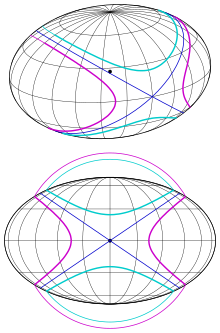



Using the above discussion let us investigate the qualitative behavior of a rigid body for a particular constant magnitude of the angular momentum sat $||\Pi||=h$. The figure below shows the intersection curves of different energy ellipsoids corresponding to different energy levels with angular momentum sphere $||\Pi||=h$. From this we see that the two relative equilibria corresponding to the body spinning along the major and minor principle axis are stable while the other relative equilibrium corresponding to the body spinning along the intermediate principle axis is unstable. All other trajectories except the four ones corresponding to the critical case are periodic trajectories in the body angular momentum space.

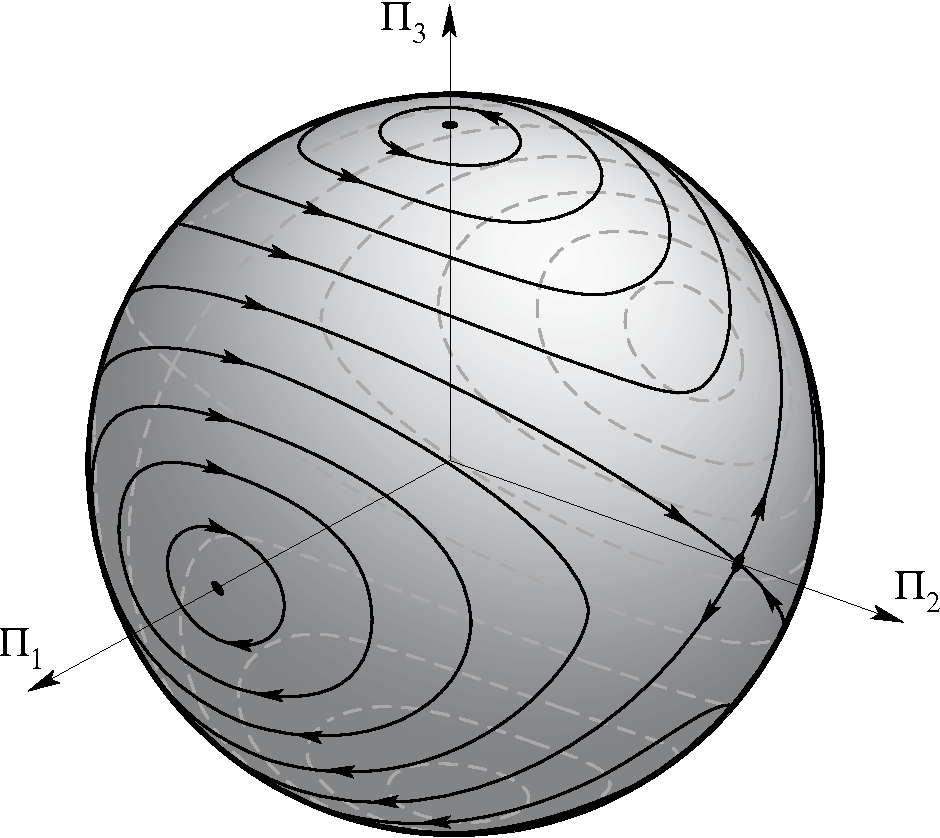


# Simulation of Rigid Body Motion

We have seen that the equations of motion of a translating and rotating rigid body takes the form
\begin{align}
\dot{o}&=\frac{1}{M}p,\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e,\\
\dot{\pi}&=\tau_e
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
and the moments are defined with respect to the center of mass of the body and $\mathbb{I}_c$ is the moment of inertia tensor of the body with respect to a body frame $\mathbf{b}$ with origin coinciding with the center of mass.

For a purely rotating rigid body we have $\dot{o}\equiv 0$, $p\equiv M \omega \times R\bar{X}$ and hence that the equations of motion are
\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=\tau_e
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}^R)^{-1}\pi,
\end{align}
and the moments are defined with respect to the pivot point of the body and $\mathbb{I}$ is the moment of inertia tensor of the body with respect to a body frame $\mathbf{b}$ with origin coinciding with the pivot point.

Notice that the purely rotating equations of motion are a subset of the first set of equations. Thus in what follows we develop a numerical integration scheme to numerically solve the more general first set of equations.

## 4th Order Runga-Kutta Method for Integrating Rigid Body Motion

Consider the dynamic system $\dot{x}=F(t,x)$ defined on $\mathbb{R}^n$ then the 4th order Runga-Kutta numerical integrations scheme for this system is given by
\begin{align}
k_1&=F(t_k\,,x_k),\\
k_2&=F(t_k+0.5h \, ,x_k+ 0.5h\,k_1),\\
k_3&=F(t_k+0.5h \, ,x_k+ 0.5h\,k_2),\\
k_4&=F(t_k+h\, ,x_k+ h\,k_3),\\
x_{k+1}&=x_k+\frac{h}{6}\left(k_1+2k_2+2k_3+k_4
  \right)
\end{align}

The dynamic system form of the rigid body equations are given by $\dot{X}=F(t,X)$ where
\begin{align}
X(t)&\triangleq \begin{bmatrix}R(t) & o(t) & \omega(t) & p(t)
\end{bmatrix}^T\\
F(t,X(t))&\triangleq \begin{bmatrix}\omega(t) & \dot{o}(t) & \dot{p}(t) & \dot{\pi}(t)
\end{bmatrix}^T
\end{align}


Let
\begin{align}
X(t_k)&\triangleq \begin{bmatrix}R(t_k) & o(t_k) & \omega(t_k) & p(t_k)
\end{bmatrix}^T\\
F(t_k,X(t_k))&\triangleq \begin{bmatrix}\omega(t_k) & \dot{o}(t_k) & \dot{p}(t_k) & \dot{\pi}(t_k)
\end{bmatrix}^T.
\end{align}

Also note that

\begin{align}
\pi(t_k)&=R(t_k)\mathbb{I}R^T(t_k)\omega(t_k).
\end{align}

---

\begin{align}
R_1(t_k+0.5h)&=\exp{\left(0.5h\widehat{\omega}(t_k)\right)}\,R(t_k)\\
o_1(t_k+0.5h)&=o(t_k)+\frac{0.5h}{M}p(t_k)\\
p_1(t_k+0.5h)&=p(t_k)+0.5h\,f(t_k,X(t_k))\\
\pi_1(t_k+0.5h)&=\pi(t_k)+ 0.5h\,\tau(t_k,X(t_k))\\
\omega_1(t_k+0.5h)&=R_1(t_k+0.5h)\mathbb{I}^{-1}R_1^T(t_k+0.5h)\pi(t_k+0.5h)
\end{align}
and
\begin{align}
X_{1_k}&\triangleq \begin{bmatrix}R_1(t_k+0.5h) & o_1(t_k+0.5h) & \omega_1(t_k+0.5h) & p_1(t_k+0.5h)
\end{bmatrix}
\end{align}

---

\begin{align}
R_2(t_k+0.5h)&=\exp{\left(0.5h\widehat{\omega}_1(t_k+0.5h)\right)}\,R(t_k)\\
o_2(t_k+0.5h)&=o(t_k)+\frac{0.5h}{M}p_1(t_k+0.5h)\\
p_2(t_k+0.5h)&=p(t_k)+0.5h\,f(t_k+0.5h,X_1(t_k+0.5h))\\
\pi_2(t_k+0.5h)&=\pi(t_k)+ 0.5h\,\tau(t_k+0.5h,X_1(t_k+0.5h))\\
\omega_2(t_k+0.5h)&=R_2(t_k+0.5h)\mathbb{I}^{-1}R_2^T(t_k+0.5h)\pi_2(t_k+0.5h)
\end{align}
and
\begin{align}
X_{2_k}&\triangleq \begin{bmatrix}R_2(t_k+0.5h) & o_2(t_k+0.5h) & \omega_2(t_k+0.5h) & p_2(t_k+0.5h)
\end{bmatrix}
\end{align}

---

\begin{align}
R_3(t_k+h)&=\exp{\left(h\widehat{\omega}_2(t_k+h)\right)}\,R(t_k)\\
o_3(t_k+h)&=o(t_k)+\frac{h}{M}p_2(t_k+0.5h)\\
p_3(t_k+h)&=p(t_k)+h\,f(t_k+h,X_2(t_k+0.5h))\\
\pi_3(t_k+h)&=\pi(t_k)+ h\,\tau(t_k+h,X_2(t_k+0.5h))\\
\omega_3(t_k+h)&=R_3(t_k+h)\mathbb{I}^{-1}R_3^T(t_k+h)\pi_3(t_k+h)
\end{align}
and
\begin{align}
X_{3_k}&\triangleq \begin{bmatrix}R_3(t_k+h) & o_3(t_k+h) & \omega_3(t_k+h) & p_3(t_k+h)
\end{bmatrix}
\end{align}

---

Thus we have
\begin{align}
R(t_k+h)&=\exp{\left(h\widehat{\omega}_k\right)}\,R(t_k)\\
o(t_k+h)&=o(t_k)+h\,{o}_k\\
p(t_k+h)&=p(t_k)+h\,f_k\\
\pi(t_k+h)&=\pi(t_k)+ h\,{\tau}_k\\
\omega(t_k+h)&=R(t_k+h)\mathbb{I}^{-1}R^T(t_k+h)\pi(t_k+h)
\end{align}
and
\begin{align}
X(t_k+h)&\triangleq \begin{bmatrix}R(t_k+h) & o(t_k+h) & \omega(t_k+h) & p(t_k+h)
\end{bmatrix}
\end{align}
where
\begin{align}
{\tau}_k&=\frac{1}{6}\left(\tau(t_k,X(t_k))+2\tau(t_k+0.5h,X_1(t_k+0.5h))+2\tau(t_k+0.5h,X_2(t_k+0.5h))+\tau(t_k+h,X_3(t_k+h))\right)\\
f_k&=\frac{1}{6}\left(f(t_k,X(t_k))+2f(t_k+0.5h,X_1(t_k+0.5h))+2f(t_k+0.5h,X_2(t_k+0.5h))+f(t_k+h,X_3(t_k+h))\right)\\
{o}_k&=\frac{1}{6}\left(\frac{1}{M}\left(p(t_k)+2p_1(t_k+0.5h)+2p_2(t_k+0.5h)+p_3(t_k+h)\right)
\right)\\
\omega_k&=\frac{1}{6}\left(\omega(t_k)+2\omega_1(t_k+0.5h)+2\omega_2(t_k+0.5h)+\omega_3(t_k+h)
\right)
\end{align}

## Example - cube pivoted at a vertex moving in gravity


Let $\mathbb{I}$ be the inertia tensor of the cube in the body frame $\mathbf{b}$ fixed to the cube with the origin coinciding with the pivot point. Let $\mathbf{b}=\mathbf{e}R$, $T^u$ be the representation of the control moments acting on the cube as expressed in the $\mathbf{b}=\mathbf{e}R$ frame, $\bar{X}$ be the representation of the center of mass of the cube as expressed in the body frame $\mathbf{b}=\mathbf{e}R$ and $e_3=[0,0,1]^T$.
Then the equations of motion in the $\mathbf{e}$ frame are:


\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=-mg\,((R\bar{X})\times e_3)+RT^u
\end{align}
where
\begin{align}
\omega &=R\mathbb{I}^{-1}R^T\pi.
\end{align}

In [ ]:
#Add the force model
def externalForceModel(qq,parameters,X):
  #Heavy Top Object
  M=parameters['M']; II=parameters['II']; g=parameters['g']; CM=parameters['CM'];
  R=X[0][0]; omega=X[1]; spi=R@ II@ R.T @ omega
  taue=(-M*g*qq.hat_matrix(R@CM) @ [0,0,1])-0*spi;
  fe=np.array([0.,0.,0.]);
  return [taue,fe]

def actuator(qq,parameters, t, X, taue,fe):
  tauu=np.array([0,0,0]);
  fu=np.array([0,0,0]);
  return [tauu,fu]

mr.set_external_force_model(externalForceModel)
mr.set_actuator(actuator)

In [ ]:
cubeDimensions={'l':2.,'w':2.,'h':4.,'xp':0.,'yp':0.,'zp':0.,};
parameters={'CM':np.array([cubeDimensions['l']/2-cubeDimensions['xp'],cubeDimensions['w']/2-cubeDimensions['yp'],cubeDimensions['h']/2-cubeDimensions['zp']]), 'g':1, 'M':1, 'II':np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])};
ICq=mr.q_from_axis_angles(np.pi/18,np.array([1,0,0])); ICR=mr.r_from_quaternions(ICq);
IComega=np.array([0.,0.,0.]); ICo=np.array([0.,0.,0.]); ICp=np.array([0.,0.,0.]);
ICXC=np.array([0,0,0]);
ICs=[[ICR,ICo],IComega,ICp,ICXC]

In [ ]:
ICp

In [ ]:
aa4=mr.simulating_a_cube(0.1, 15., cubeDimensions, parameters,ICs)
fig1=mr.animated_cube_flat_shading(aa4,'Cube Pivoted at a Vertex')

# Rigid Body PID Control

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

We have seen that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

## The trajectory tracking problem

In this section we investigate the problem of ensuring asymptotic tracking of a sufficiently smooth trajectory $(o(t),R_r(t))$ in $\mathbb{R}^3\times SO(3)$.

Notice that the momentum equations are linear. Thus if the system is fully actuated all one needs is PID control.

However since the configuration space $\mathbb{R}^3\times SO(3)$ of rigid body motion is not a vector space defining the proportional and integral terms require some care.

Notice that the equations of motion are defined in the spatial momentum space. Thus the 'correct' way to define the configuration error and the integral term is to ensure that they are also spatial frame momentum quantities. We demonsrate below how this can be done.

### Configuration Error

We notice that the configuration space $\mathbb{R}^3\times SO(3)$ is a group. It is closed under the multiplication operation defined as follows. For
$(a_1,R_1),(a_2,R_2)\in \mathbb{R}^3\times SO(3)$
\begin{align}
(a_1,R_1)\cdot (a_2,R_2)&\triangleq \left((a_1-a_2),R_1R_2\right)
\end{align}
It has the unique inverse
\begin{align}
(a_1,R_1)^{-1}&\triangleq \left(-a_1,R_1^{-1}\right).
\end{align}

Now one can define the configuration error between a system configuration $(o,R)\in \mathbb{R}^3\times SO(3)$ and a reference configuration $(o_r,R_r)\in \mathbb{R}^3\times SO(3)$ in a global sense as  
\begin{align}
(o_e,R_e)\triangleq \left((o_r-o),R^{-1}R_r\right)\in \mathbb{R}^3\times SO(3),
\end{align}
or alternatively as
\begin{align}
(o_e,R_e)\triangleq \left((o_r-o),R_rR^{-1}\right)\in \mathbb{R}^3\times SO(3),
\end{align}

The former is defined as the *left-invariant* error while the latter is defined as the *right-invariant* error.

Notice that both these errors are in the configuration space $\mathbb{R}^3\times SO(3)$ and not in the spatial momentum space of $\mathbb{R}^3\times SO(3)$.

### Tracking Error dynamics

Let $(o(t),R_r(t))$ be a desired trajectory and $\omega_r(t)$ be such that $\widehat{\omega}_r(t)=\dot{R}_rR_r^T$. In line with the system define the reference spatial linear momentum $p_r\triangleq M\dot{o_r}$ and the spatial angular momentum $\pi_r\triangleq R_r\mathbb{I}R_r^T\omega_r$

Define the configurarion error
\begin{align}
o_e&=o_r-o,\\
R_e&=R_rR^T.
\end{align}
Then the spatial angular velcity of the tracking error is defined by
\begin{align}
\widehat{\omega}_e&\triangleq \dot{R}_eR_e^T=\widehat{\omega}_r(t)-R_e\widehat{\omega}(t)R_e^T
\end{align}
and hence that
\begin{align}
\omega_e&=\omega_r-R_e\omega.
\end{align}
Define the angular momentum error as
\begin{align}
\pi_e\triangleq R\mathbb{I}R_r^T\omega_e=R\mathbb{I}R_r^T(\omega_r-R_e\omega)=R\mathbb{I}R_r^T\omega_r-R\mathbb{I}R^T\omega=R_e^T\pi_r-\pi.
\end{align}
Similarly define the linear momentum error $p_e\triangleq p_r-p$.

Differentiating $\pi_e$ we have
\begin{align}
\dot{\pi}_e&=R_e^T(\dot{\pi}_r-\omega_e\times \pi_r)-\dot{\pi}=R_e^T(R_r\dot{\Pi}_r+(\omega_r-\omega_e)\times \pi_r)-\dot{\pi}=(R\dot{\Pi}_r+\omega\times \pi_r)-\dot{\pi}
\end{align}



Thus we have the error dynamics
\begin{align}
\dot{o}_e&=\frac{1}{M}p_e,\\
\dot{R}_e&=\widehat{\omega}_eR_e,\\
\dot{p}_e&=M\ddot{o}_r-f^e-f^u,\\
\dot{\pi}_e&=(R\dot{\Pi}_r+\omega\times \pi_r)-\tau^e-\tau^u
\end{align}

### Feedforward plus PID-Control

\begin{align}
\dot{e}_{I_o}&=e_o,\\
f^u&=M\ddot{o}_r+k_{P_o}e_o+k_{D_o}p_e+k_{I_o}e_{I_o}\\
\dot{e}_{I_R}&=e_R,\\
\tau^u&=(R\dot{\Pi}_r+\omega\times \pi_r)-\tau^e+k_{P_R}e_R+k_{D_R}\pi_e+k_{I_R}e_{I_R}
\end{align}

### Controlled Error Dynamics

\begin{align}
\dot{e}_{I_o}&=e_o,\\
\dot{o}_e&=\frac{1}{M}p_e,\\
\dot{p}_e&=-k_{P_o}e_o-k_{D_o}p_e-k_{I_o}e_{I_o},\\
\dot{e}_{I_R}&=e_R,\\
\dot{R}_e&=\widehat{\omega}_eR_e,\\
\dot{\pi}_e&=-k_{P_R}e_R-k_{D_R}\pi_e-k_{I_R}e_{I_R}
\end{align}

Here \begin{align}
o_e&=o_r-o,\\
R_e&=R_rR^T.
\end{align}
$\widehat{\omega}_r(t)=\dot{R}_rR_r^T$, $p_r\triangleq M\dot{o_r}$, $\pi_r\triangleq R_r\mathbb{I}R_r^T\omega_r$
\begin{align}
\omega_e&=\omega_r-R_e\omega,
\end{align}
\begin{align}
\pi_e\triangleq R\mathbb{I}R_r^T\omega_e,
\end{align}
and $p_e\triangleq p_r-p$.

In the section below we proceed to find the correct proportional control action $(e_o,e_R)$.

### Appropriate form of the Proportional Control Term

We notice that on the vectorspace $\mathbb{R}^n$ the proportional control is proportional to $e\in \mathbb{R}^n$ and that it can be thought of as $e=df$ where $f:\mathbb{R}^n\mapsto \mathbb{R}$ is the quatratic function defined by $f(e)=e^Te$. From a geometric point of view the derivative of $f$ given by $df=e$ is an element of the 'momentum' space of $\mathbb{R}^n$.


As shown below we reproduce this process on $\mathbb{R}^3\times SO(3)$. Let $(o_e,R_e) \in \mathbb{R}^3\times SO(3)$ be the configuration error. Define the *error function*
$f:\mathbb{R}^3\times SO(3)\mapsto \mathbb{R}$ as follows:
\begin{align}
f(o_e,R_e)&=\frac{1}{2}\left(o_e^To_e+\mathrm{trace} \left(K(I_{3\times 3}-R_e)\right)\right),
\end{align}
where
\begin{align}
K&=\mathrm{diag}\{\mathbb{K}_1,\mathbb{K}_2,\mathbb{K}_3\}.
\end{align}
This function has a minimum when $(o_e,R_e)=(0,I_{3\times 3})$.


Recall that there exisits $(\theta_e,n_e)$ such that
\begin{align}
R_e&=I_{3\times 3}+\sin{\theta_e}\,\widehat{n}_e+(1-\cos{\theta_e})\,\widehat{n}^2_e.
\end{align}
Thus we see that the error function takes the form
\begin{align}
f(o_e,R_e)&=\frac{1}{2}\left(o_e^To_e+2\alpha_n\sin^2{\left(\frac{\theta_e}{2}\right)}\right)
\end{align}
where
$\alpha_n\triangleq \frac{1}{2}\left((\mathbb{K}_2+\mathbb{K}_3)n_{e_1}^2+(\mathbb{K}_3+\mathbb{K}_1)n_{e_2}^2+(\mathbb{K}_1+\mathbb{K}_2)n_{e_3}^2\right)$.

Let us find the derivative of the function. Consider an arbitrary curve, $c(s)$ on $\mathbb{R}^3\times SO(3)$ that passes through $(o_e,R_e)$. That is let $c(s)=(o(s),R(s))\in\mathbb{R}^3\times SO(3)$ where
$c:[-\epsilon,\epsilon] \mapsto \mathbb{R}^3\times SO(3)$
be such that $(o(0),R(0))=(o,R)$. Then the tangent to this curve at $(o,R)$ is definded by $(o',\omega')$ where
\begin{align}
o'&\triangleq\left.\dfrac{d}{ds}\right|_{s=0}o_e(s),\\
\widehat{\omega}'&\triangleq \left(\left.\dfrac{d}{ds}\right|_{s=0}R_e(s)\right)R^T_e.
\end{align}
Then the derivative of the function $f$, that is denoted by $(e_o,e_R)$ is defined by  
\begin{align}
\langle e_o,o'\rangle&=\left.\dfrac{d}{ds}\right|_{s=0}\frac{1}{2}(o^T_e(s)o_e(s))=\langle o_e,o'\rangle,\\
\langle e_R,\omega'\rangle&=\left.\dfrac{d}{ds}\right|_{s=0}\frac{1}{2}\left(\mathrm{trace}(K(I_{3\times3}-R_e(s)))\right)=-\frac{1}{2}\left(\mathrm{trace}(K\widehat{\omega}'R_e)\right)=-\frac{1}{4}\left(\mathrm{trace}((R_eK-KR_e^T)\widehat{\omega}')\right)=\langle e_R,\omega'\rangle,\\
\end{align}
Thus $e_R$ is given by
\begin{align}
\widehat{e}_R&=\frac{1}{2}\left(R_eK-KR_e^T\right).
\end{align}


From $R_e=I_{3\times 3}+\sin{\theta_e}\,\widehat{n}_e+(1-\cos{\theta_e})\,\widehat{n}^2_e$ we thus see that
\begin{align}
\widehat{e}_R&=\frac{1}{2}\left(\sin{\theta_e}(\widehat{n}_eK+K\widehat{n}_e)+2\sin^2{\left(\frac{\theta_e}{2}\right)}(\widehat{n}_e^2K-K\widehat{n}_e^2)\right).
\end{align}
Thus we see that when $\theta_e=0$ or when $\theta_e=\pi$ and $n_e\in \{e_1,e_2,e_3\}$ the derivative of $f$ is zero.

From the above analysis we see that the function $f$ has four critical points $\{(0,I_{3\times 3}),(0,N_1),(0,N_2),(0,N_3)\}$ where $N_i$ is a rotation about $e_i$ by an angle $\pi$. Out of these $(0,I_{3\times 3})$ is a global minimum while $\{(0,N_1),(0,N_2),(0,N_3)\}$ are global maxima. One can show that this is the closest that we can come to the notion of a quadartic function on $\mathbb{R}^3\times SO(3)$.

In [ ]:
K_1, K_2, K_3, n_1, n_2, n_3=symbols('K_1, K_2, K_3, n_1, n_2, n_3')

In [ ]:
K=Matrix([[K_1,0,0],[0,K_2,0],[0,0,K_3]]);
hatN=Matrix([[0,-n_3,n_2],[n_3,0,-n_1],[-n_2,n_1,0]])

## Example #1: Trajectory Tracking of a Fully Actuated Cube Pivoted at a Vertex

### The Equations of motion in the inertial frame $\mathbf{e}$


Let $\mathbb{I}$ be the inertia tensor of the cube in the body frame $\mathbf{b}$ fixed to the cube with the origin coinciding at the vertex that is pivoted. Let $\mathbf{b}=\mathbf{e}R$, $T^u$ be the representation of the control moments acting on the cube as expressed in the $\mathbf{b}=\mathbf{e}R$ frame, $l\,\gamma$ be the representation of the center of mass of the cube as expressed in the body frame $\mathbf{b}=\mathbf{e}R$ where $||\gamma||=1$ and $e_3=[0,0,1]^T$.

Then the equations of motion in the $\mathbf{e}$ frame are:


\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=-mgl\,(R\gamma\times e_3)+RT^u
\end{align}
where $\pi=R\mathbb{I}\Omega=R\mathbb{I}R^T\omega$

In [ ]:
def externalForceModel(qq,parameters,X):
  #Heavy Top Object
  R=X[0][0];
  M=parameters['M']; g=parameters['g']; CM=parameters['CM'];
  fe=np.array([0,0,0]);
  taue=(-M*g*qq.hat_matrix(R@CM) @ [0,0,1]);
  return [taue,fe]

def actuator(qq,parameters, t, X, taue,fe):
  Uc=controller(qq, parameters, t, X, taue,fe);
  tauu=Uc[0]; fu=Uc[1]
  return [tauu,fu]

mr.set_external_force_model(externalForceModel)
mr.set_actuator(actuator)

### The Feedforward plus PID controller

We consider the problem of $\lim_{t\to \infty}R(t)=R_r(t)$ where $R_r(t)\in SO(3)$ is a twice differentiable trajectory on $SO(3)$.

Let $\widehat{\omega}_r(t)=\dot{R}_rR_r^T$,  $\pi_r\triangleq R_r\mathbb{I}R_r^T\omega_r$
\begin{align}
R_e&\triangleq R_rR^T.
\end{align}
\begin{align}
\omega_e&\triangleq \omega_r-R_e\omega,
\end{align}  
and
\begin{align}
\pi_e\triangleq R\mathbb{I}R_r^T\omega_e.
\end{align}

\begin{align}
\widehat{e}_R&\triangleq \frac{1}{2}\left(R_eK-KR_e^T\right).
\end{align}

\begin{align}
\dot{e}_{I_o}&=e_o,\\
f^u&=M\ddot{o}_r+k_{P_o}e_o+k_{D_o}p_e+k_{I_o}e_{I_o}\\
\dot{e}_{I_R}&=e_R,\\
\tau^u&=(R\dot{\Pi}_r+\omega\times \pi_r)-mgl\,(R\gamma\times e_3)+k_{P_R}e_R+k_{D_R}\pi_e+k_{I_R}e_{I_R}
\end{align}

In [ ]:
def referenceConfig(qq,refParameters,t):
  II=refParameters;
  dotOmegart=np.array([0,.01,0]);
  dotPir=II@dotOmegart;
  Omegart=np.array([0,0,0])+dotOmegart*t;
  Pir=II@Omegart;
  thetaOmegart=linalg.norm(Omegart)*t+0*np.pi;
  nOmegart=Omegart/(0.000001+linalg.norm(Omegart));
  qOmegart=np.concatenate(([np.cos(thetaOmegart/2)],np.sin(thetaOmegart/2)*nOmegart));
  Rr=qq.r_from_quaternions(qOmegart);
  return [Rr,Pir,dotPir]

def controller(qq,parameters,t,X,taue,fe):
  #Fully Actuated PD Controller
  II=parameters['II'];
  R=X[0][0]; omega=X[1]; piI=X[3];
  [Rr,Pir,dotPir]=referenceConfig(qq,II,t);
  pir=Rr@Pir;
  omegar=Rr@linalg.inv(II)@Pir;
  Re=Rr@R.T;
  pie=R @ II @ Rr.T @ (omegar-Re@omega);
  K=np.array([[1,0,0],[0,2,0],[0,0,3]]);
  eRhat=0.5*(Re@K-K@Re.T);
  eR=np.array([-eRhat[1,2],eRhat[0,2],-eRhat[0,1]]);
  tauu=(R@dotPir+qq.hat_matrix(omega)@pir)-0.*taue+(4*eR+10*pie+2.*piI)
  fu=-fe+np.array([0,0,0]);
  return [tauu,fu,eR,pie]

def controller_dynamics(qq, t,X,taue,fe,parameters):
  Xc=X[3];
  Uc=controller(qq,parameters,t,X,taue,fe);
  eR=Uc[2];
  dXc=eR;
  #print(eR)
  return dXc

mr.set_external_force_model(externalForceModel)
mr.set_actuator(actuator)

### Simulation Verification

In [ ]:
cubeDimensions={'l':2,'w':2,'h':4,'xp':1,'yp':1,'zp':0.,};
parameters={'CM':np.array([cubeDimensions['l']/2-cubeDimensions['xp'],cubeDimensions['w']/2-cubeDimensions['yp'],cubeDimensions['h']/2-cubeDimensions['zp']]), 'g':1, 'M':1, 'II':np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])};
ICq=mr.q_from_axis_angles(np.pi-np.pi/6,np.array([1,0,0]));
ICR=mr.r_from_quaternions(ICq);
ICOmega=np.array([0.,0.,0.]); ICo=np.array([0.,0.,0.]); ICp=np.array([0.,0.,0.]);
ICXC=np.array([0,0,0]);
ICs=[[ICR,ICo],ICR@ICOmega,ICp,ICXC]

In [ ]:
aa4=mr.simulating_a_cube(0.2, 50., cubeDimensions, parameters,ICs)
fig1=mr.animated_cube_flat_shading(aa4,'Fully Actuated Cube Pivoted at a Vertex')

## Example #2: Vertical Stabilization of an Under Actuated Cube Pivoted at a Vertex

### The Equations of motion in the inertial frame $\mathbf{e}$


Let $\mathbb{I}$ be the inertia tensor of the cube in the body frame $\mathbf{b}$ fixed to the cube with the origin coinciding at the vertex that is pivoted. Let $\mathbf{b}=\mathbf{e}R$, $T^u$ be the representation of the control moments acting on the cube as expressed in the $\mathbf{b}=\mathbf{e}R$ frame, $l\,\gamma$ be the representation of the center of mass of the cube as expressed in the body frame $\mathbf{b}=\mathbf{e}R$ where $||\gamma||=1$ and $e_3=[0,0,1]^T$.

Then the equations of motion in the $\mathbf{e}$ frame are:


\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=-mg\,(R\gamma\times e_3)+RT^u
\end{align}
where $\pi=R\mathbb{I}\Omega=R\mathbb{I}R^T\omega$

We consider the case where the cube is under actuated:
\begin{align*}
T^u\triangleq u_1e_1+u_2e_2.
\end{align*}

We can use the same controller projectd on to the actuation subsapce:
\begin{align}
\dot{e}_{I_o}&=e_o,\\
f^u&=M\ddot{o}_r+k_{P_o}e_o+k_{D_o}p_e+k_{I_o}e_{I_o}\\
\dot{e}_{I_R}&=e_R,\\
T^u&=PR^T\left((R\dot{\Pi}_r+\omega\times \pi_r)-\tau^e+k_{P_R}e_R+k_{D_R}\pi_e+k_{I_R}e_{I_R}\right)
\end{align}
where $P=-\widehat{e}_3^2$.

In [ ]:
def externalForceModel(qq,parameters,X):
  #Heavy Top Object
  R=X[0][0];
  M=parameters['M']; g=parameters['g']; CM=parameters['CM'];
  fe=np.array([0,0,0]);
  taue=(-M*g*qq.hat_matrix(R@CM) @ [0,0,1]);
  return [taue,fe]

def actuator(qq,parameters, t, X, taue,fe):
  R=X[0][0];
  Uc=controller(qq, parameters, t, X, taue,fe);
  Tu=R.T@Uc[0]; fu=Uc[1]
  taua=R@np.array([Tu[0],Tu[1],0]);
  return [taua,fu]

In [ ]:
def referenceConfig(qq,refParameters,t):
  II=refParameters;
  dotOmegart=np.array([0,0,0]);
  dotPir=II@dotOmegart;
  Omegart=np.array([0,0,0])+dotOmegart*t;
  Pir=II@Omegart;
  thetaOmegart=linalg.norm(Omegart)*t+0*np.pi;
  nOmegart=Omegart/(0.000001+linalg.norm(Omegart));
  qOmegart=np.concatenate(([np.cos(thetaOmegart/2)],np.sin(thetaOmegart/2)*nOmegart));
  Rr=qq.r_from_quaternions(qOmegart);
  return [Rr,Pir,dotPir]

def controller(qq,parameters,t,X,taue,fe):
  #Fully Actuated PD Controller
  II=parameters['II'];
  R=X[0][0]; omega=X[1]; piI=X[3];
  [Rr,Pir,dotPir]=referenceConfig(qq,II,t);
  pir=Rr@Pir;
  omegar=Rr@linalg.inv(II)@Pir;
  Re=Rr@R.T;
  pie=R @ II @ Rr.T @ (omegar-Re@omega);
  K=np.array([[1,0,0],[0,2,0],[0,0,3]]);
  eRhat=0.5*(Re@K-K@Re.T);
  eR=np.array([-eRhat[1,2],eRhat[0,2],-eRhat[0,1]]);
  tauu=(R@dotPir+qq.hat_matrix(omega)@pir)-0.*taue+(4*eR+10*pie+.02*piI)
  fu=-fe+np.array([0,0,0]);
  return [tauu,fu,eR,pie]

def controller_dynamics(qq, t,X,taue,fe,parameters):
  Xc=X[3];
  Uc=controller(qq,parameters,t,X,taue,fe);
  eR=Uc[2];
  dXc=eR;
  #print(eR)
  return dXc

mr.set_external_force_model(externalForceModel)
mr.set_actuator(actuator)

In [ ]:
aa5=mr.simulating_a_cube(0.2, 20., cubeDimensions, parameters,ICs)
fig2=mr.animated_cube_flat_shading(aa5,'Under Actuated Cube Pivoted at a Vertex')

## Cube Pivoted at CM With Gimbaled Actuation

Let $\mathbb{I}$ be the inertia tensor of the cube in the body frame $\mathbf{b}$ fixed to the cube with the origin coinciding at the vertex that is pivoted. Let $\mathbf{b}=\mathbf{e}R$, $T^u$ be the representation of the control moments acting on the cube as expressed in the $\mathbf{b}=\mathbf{e}R$ frame, $l\,\gamma$ be the representation of the center of mass of the cube as expressed in the body frame $\mathbf{b}=\mathbf{e}R$ where $||\gamma||=1$ and $e_3=[0,0,1]^T$.

Then the equations of motion in the $\mathbf{e}$ frame are:


\begin{align}
\dot{R}&=\widehat{\omega}R,\\
\dot{\pi}&=RT^u
\end{align}
where $\pi=R\mathbb{I}\Omega=R\mathbb{I}R^T\omega$

### Gimbaled Actuation

Let us parameterize the rotation matrix from the earth fixed frame $\mathbf{e}$ to a disk fixed frame $\mathbf{d}$ using the 3-1-3 Euler angles.  We will need this to express the force moment
\begin{align*}
T^u&=\begin{bmatrix}
T_1 \\ T_2\\ T_3
\end{bmatrix}
\end{align*}

Let $\mathbf{e}$ be an Earth fixed frame with origin, $O$. A frame $\mathbf{b}$ is fixed to the outer gimbal of the Gyroscope, a frame $\mathbf{c}$ is fixed to the inner gimbal and a frame $\mathbf{d}$ is fixed on the
disc. Let $\mathbf{d}(t)=\mathbf{e}\,R(t)$.
The $\mathbf{b}(t)$ frame is fixed on the outer gimbal so that $\mathbf{b}_3(t)\equiv \mathbf{e}_3(t)$. Then $\mathbf{b}(t)=\mathbf{e}\,R_3(\theta_1(t))$ where $\theta_1$ is the angle of rotation of $\mathbf{b}$ about the fixed $\mathbf{e}_3, \mathbf{b}_3$
axis.
The frame $\mathbf{c}(t)$ is fixed on the inner gimbal so that $\mathbf{c}_1(t)\equiv \mathbf{b}_1(t)$. Then $\mathbf{c}(t)=\mathbf{b}(t)\,R_1(\theta_2(t))$ where
$\theta_2$ is the angle of rotation of $\mathbf{c}$ about the $\mathbf{c}_1, \mathbf{b}_1$ axis.
The frame $\mathbf{d}(t)$ is fixed on the disc so that $\mathbf{d}_3(t)\equiv \mathbf{c}_3(t)$. Then $\mathbf{d}(t)=\mathbf{c}(t)\,R_3(\theta_3(t))$ where
$\theta_3$ is the angle of rotation of $\mathbf{c}$ about the $\mathbf{c}_3, \mathbf{d}_3$ axis.

Now since $\mathbf{d}(t)=\mathbf{e}\,R(t)$ we have that
\begin{align*}
R&=R_3(\theta_1)R_1(\theta_2)R_3(\theta_3)=
\begin{bmatrix}
c_1c_3-c_2s_1s_3 & c_2c_3s_1+c_1s_3 & s_1s_2  \\
-c_3s_1-c_1c_2s_3 & c_1c_2c_3-s_1s_3 & c_1s_2\\
s_2s_3 & -c_3s_2 & c_2
\end{bmatrix}
\end{align*}

and hence that $R$ is naturally parameterized by the 3-1-3 Euler angles. Recall that these are singular when $\theta_2=0,\pi$.

Neglecting the gimbal inertia, the force moments acting on the disc are calculated as follows.
The moments acting on the outer gimbal due to the fixed end:
\begin{align*}
\mathbf{e} T^1 = \mathbf{e}\,
\begin{bmatrix}
T^1_1\\ T_2^1 \\ u_1
\end{bmatrix}
\end{align*}
The moments acting on the inner Gimbal due to the outer Gimbal:
\begin{align*}
\mathbf{b} T^2 =\mathbf{b}
\begin{bmatrix}
u_2\\ T^2_2 \\ T_3^2
\end{bmatrix}
\end{align*}
The moments acting on the disc due to the inner Gimbal:
\begin{align*}
\mathbf{c}\,T^3=\mathbf{c}
\begin{bmatrix}
T_1^3\\ T_2^3 \\ u_3
\end{bmatrix}=\mathbf{d}\,T^u
\end{align*}

Neglecting the inertia of the outer and inner gimbals we have
\begin{align*}
\mathbf{e}\,T^1=-\mathbf{b}\,T^2,\:\:\:\:\:\:\mathbf{b}\,T^2=-\mathbf{c}\,T^3
\end{align*}
and hence
\begin{align*}
T^1=-R_3(\theta_1)\,T^2,\:\:\:\:\: T^2=-R_1(\theta_2)\,T^3,\:\:\:\:\: T^3=R_3(\theta_3)\, T^u,
\end{align*}
and
\begin{align*}
T^1=R_3(\theta_1)R_1(\theta_2)R_3(\theta_3)T^u,\:\:\:\: T^1 = R\, T^u.
\end{align*}

From the first set of equations we have that $T^2_3=-u_1$ and from the second set of equations we have that $T_1^3=-
u_2$. Substituting these in the second set of equations we have
\begin{align*}
\begin{bmatrix}
u_2\\ T^2_2 \\ -u_1
\end{bmatrix}
=
R_1(\theta_2) \begin{bmatrix}
u_2\\ -T_2^3 \\ -u_3
\end{bmatrix}
\end{align*}
The last equation in this set of equations give
\begin{align*}
T^3_2=\frac{(u_1-\cos{\theta_2}u_3)}{\sin{\theta_2}}.
\end{align*}
Now since $T^3=R_3\,T^u$ the force moments on the disc expressed in $\mathbf{d}$ is given by
\begin{align*}
T^u=
R_3^T
\begin{bmatrix}
-u_2\\ \frac{(u_1-\cos{\theta_2}u_3)}{\sin{\theta_2}} \\ u_3
\end{bmatrix}
=
\begin{bmatrix}
\cos{\theta_3} & \sin{\theta_3} & 0 \\
-\sin{\theta_3} & \cos{\theta_3} & 0\\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
0 & -1 & 0 \\
\frac{1}{\sin{\theta_2}} & 0 & -\cot{\theta_2}\\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
u_1\\ u_2 \\ u_3
\end{bmatrix}
\end{align*}

\begin{align*}
T^u=
\begin{bmatrix}
\frac{\sin{\theta_3}}{\sin{\theta_2}} & -\cos{\theta_3} & -\sin{\theta_3}\cot{\theta_2} \\
\frac{\cos{\theta_3}}{\sin{\theta_2}} & \sin{\theta_3} & -\cos{\theta_3}\cot{\theta_2}\\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
u_1\\ u_2 \\ u_3
\end{bmatrix}
\end{align*}
Here $u_1,u_2$ and $u_3$ are the external moments applied about the rotation axis of the oute gimbal, the rotation axis of the inner gimbal and the rotation axis of the disc.

Observe that the above expression for the force moment becomes singular when $\theta_2=0$ or $\theta_2=\pi$. At these angels the external moment directions on the outer gimbal
and the disc coincides. This situation is commonly referred to as gimbal locking.

